# Test longitudinal Twitter data
Test the validity of the Twitter disaster data as a signal for locals vs. non-locals.

In [22]:
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
import gzip
import re
import os
import numpy as np

## Load data

In [88]:
# replace tweet-final URLs
url_matcher = re.compile('(https?[^#]+)|(pic\.twitter\.com[^#]+)')
def clean_txt(txt):
    txt_clean = url_matcher.sub('<URL>', txt)
    return txt_clean
file_matcher = re.compile('#Maria.*\.gz')
data_dir = '../../data/mined_tweets/'
twitter_data_files = sorted([f for f in os.listdir(data_dir) if file_matcher.search(f)])
print('twitter data files\n%s'%('\n'.join(twitter_data_files)))
twitter_use_cols = ['username', 'date', 'text', 'geo', 'id']
twitter_data = pd.concat([pd.read_csv(os.path.join(data_dir, f), sep='\t', index_col=False, usecols=twitter_use_cols) for f in twitter_data_files], axis=0)
twitter_data.loc[:, 'text'] = twitter_data.loc[:, 'text'].apply(clean_txt)
display(twitter_data.head())
print('%d tweets with geo info'%(twitter_data[~twitter_data.loc[:, 'geo'].apply(lambda x: type(x) is float and np.isnan(x))].shape[0]))
# deduplicate data to reduce RTs
twitter_data_dedup = twitter_data.drop_duplicates('text', inplace=False)
# only keep tweets with Maria hashtags to filter chatter
allowed_hashtags = ['#maria', '#hurricanemaria']
hashtag_matcher = re.compile('|'.join(allowed_hashtags))
twitter_data_filter = twitter_data_dedup[twitter_data_dedup.loc[:, 'text'].apply(lambda x: hashtag_matcher.search(x.lower()) is not None)]
print('%d/%d deduplicated tweets'%(twitter_data_filter.shape[0], twitter_data.shape[0]))

twitter data files
#Maria,#HurricaneMaria,#PuertoRico_2017-08-30_2017-08-31.gz
#Maria,#HurricaneMaria,#PuertoRico_2017-08-31_2017-09-01.gz
#Maria,#HurricaneMaria,#PuertoRico_2017-09-01_2017-09-02.gz
#Maria,#HurricaneMaria,#PuertoRico_2017-09-02_2017-09-03.gz
#Maria,#HurricaneMaria,#PuertoRico_2017-09-03_2017-09-04.gz
#Maria,#HurricaneMaria,#PuertoRico_2017-09-13_2017-09-14.gz
#Maria,#HurricaneMaria,#PuertoRico_2017-09-14_2017-09-15.gz
#Maria,#HurricaneMaria,#PuertoRico_2017-09-15_2017-09-16.gz
#Maria,#HurricaneMaria,#PuertoRico_2017-09-16_2017-09-17.gz
#Maria,#HurricaneMaria,#PuertoRico_2017-09-17_2017-09-18.gz
#Maria,#HurricaneMaria,#PuertoRico_2017-09-18_2017-09-19.gz
#Maria,#HurricaneMaria,#PuertoRico_2017-09-19_2017-09-20.gz
#Maria,#HurricaneMaria,#PuertoRico_2017-09-20_2017-09-21.gz
#Maria,#HurricaneMaria,#PuertoRico_2017-09-21_2017-09-22.gz
#Maria,#HurricaneMaria,#PuertoRico_2017-09-22_2017-09-23.gz
#Maria,#HurricaneMaria,#PuertoRico_2017-09-23_2017-09-24.gz
#Maria,#HurricaneMari

,username,date,text,geo,id
0,DrDisdier,2017-08-30 19:58,@JPAL_NA Creando puentes entre el gobierno y l...,NaN,9.030444e+17
1,NotiPuertoRico,2017-08-30 19:53,Puerto Rico protesta contra medidas de austeri...,NaN,9.030431e+17
2,NotiPuertoRico,2017-08-30 19:53,Millonaria demanda contra OMB se ventilará en ...,NaN,9.030431e+17
3,ShowTuFli,2017-08-30 19:47,New music every week real soon! The clip full!...,NaN,9.030416e+17
4,sammysamuelrios,2017-08-30 19:46,#WEDDINGPHOTOGRAPHY #puertorico <URL>#photogra...,NaN,9.030412e+17


35 tweets with geo info
101331/350400 deduplicated tweets


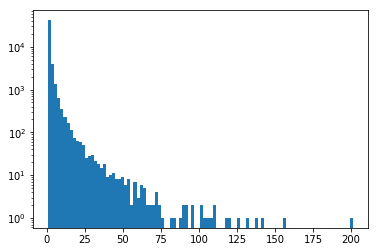

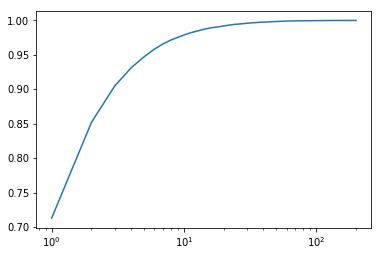

In [89]:
# get username counts
username_counts = twitter_data_filter.loc[:, 'username'].value_counts()
username_count_counts = username_counts.value_counts()
username_count_counts = username_count_counts.loc[sorted(username_count_counts.index)]
# histogram
plt.hist(username_counts.values, bins=100)
plt.yscale('log')
plt.show()
# cdf
username_cdf = username_count_counts.cumsum() / username_count_counts.sum()
plt.plot(username_cdf.index, username_cdf)
# plt.yscale('log')
plt.xscale('log')
plt.show()

In [190]:
user_lower_cutoff = 5
user_upper_cutoff = 15
consistent_users = username_counts[(username_counts >= user_lower_cutoff) & (username_counts <= user_upper_cutoff)].index
print('%d users with %d < posts < %d'%(len(consistent_users), user_lower_cutoff, user_upper_cutoff))

2782 users with 5 < posts < 15


In [197]:
# let's see some of their posts
twitter_data_consistent = twitter_data_filter[twitter_data_filter.loc[:, 'username'].isin(consistent_users)]
print('consistent users made %.1f%% of posts (%d/%d)'%(twitter_data_consistent.shape[0] / twitter_data.shape[0]*100, twitter_data_consistent.shape[0], twitter_data.shape[0]))
print('\n'.join(twitter_data_consistent.loc[:, 'text'].values[5500:5600]))

consistent users made 6.0% of posts (21105/350400)
Watching closely for waterspouts & tornadoes as outer bands from #HurricaneMaria start to make landfall on the eastern coastline #PuertoRico <URL>
Watch “Governor Rossell&oacute;&#039;s national address in the face of danger” on #Vimeo #puertorico #maria <URL>
5 PM Advisory: #Maria continues as a #Cat5 Winds at 165 mph. Track continues to keep it away from FL. #tropics <URL>
Boarded up #HurricaneMaria <URL>
Latest forecast track of #Maria has changed little - Puerto Rico tomorrow, Hispaniola Thursday, then we watch <URL>
Rough seas from #HurricaneJose are causing #beach erosion on Fire #Island . #NewYork <URL>#Jose #HurricaneMaria #Maria
#Maria continuing to intensify this afternoon w/ colder cloud tops and contracting eye. Infrared satellite loop via UW-SSEC <URL>
Gaat nu recht op #StCroix af #HurricaneMaria Benieuwd of de webcam aan de noordkust het houdt <URL>#Christiansted <URL>
#Container homes offer remarkable value. <URL>#Hurric

This isn't a huge number but it's a start. We'll need to query the user bios for these users in order to determine local vs. non-local.

In [49]:
out_file_name = '../../data/mined_tweets/twitter_Maria_consistent_users.txt'
with open(out_file_name, 'w') as out_file:
    out_file.write('\n'.join(sorted(consistent_users.index)))

Sanity check: how many of these users mention major locations?

- San Juan(, PR)

In [200]:
import re
loc_matcher_1 = re.compile('San Juan(?!, Puerto Rico)(?!, PR)(?! Puerto Rico)')
loc_matcher_2 = re.compile('San Juan, Puerto Rico|San Juan, PR')
twitter_data_consistent_loc_1 = twitter_data_consistent[twitter_data_consistent.apply(lambda x: loc_matcher_1.search(x.loc['text']) is not None, axis=1)]
twitter_data_consistent_loc_2 = twitter_data_consistent[twitter_data_consistent.apply(lambda x: loc_matcher_2.search(x.loc['text']) is not None, axis=1)]
print('*~*~*~*~*~*~*~*~ bare loc *~*~*~*~*~*~*~*~')
# print(twitter_data_consistent_loc_1.loc[:, ['text', 'username']].head(50))
print('\n'.join(twitter_data_consistent_loc_1.loc[:, 'text'].head(50).values))
print('*~*~*~*~*~*~*~*~ desc loc *~*~*~*~*~*~*~*~')
print('\n'.join(twitter_data_consistent_loc_2.loc[:, 'text'].head(50).values))

*~*~*~*~*~*~*~*~ bare loc *~*~*~*~*~*~*~*~
#HurricaneMaria is expected to impact areas hit hard by #HurricaneIrma with USVI and San Juan in the firing line <URL>
Shops in San Juan #PuertoRico rationing basic supplies (like water) ahead of #HurricaneMaria . Many concerned about this track @WPLGLocal10 <URL>
In advance of #HurricaneMaria , flights to/from San Juan (SJU) are canceled on Wednesday, 9/20. Travel waiver: <URL>
We still have employees in San Juan out of power from #HurricaneIrma and now they must endure #HurricaneMaria as a CAT 4 <URL>
More slo-mo in to #sanjuanpuertorico to cover #hurricanemaria @San Juan <URL>
SLO-mo approach over #SanJuan #PuertoRico to cover #hurricane #Maria @San Juan <URL>
Re: #HurricaneMaria 3.4 million people live in #PuertoRico . That's the same size as Tampa/area in Florida. 29 airlines fly to San Juan..
#Maria PR may take big hit. As of 5a EDT, >50% sustained hurricane force winds in San Juan. Odds likely 11a. <URL>
UPDATE: #Maria sustained winds u

Qualitatively it looks like the bare-NP tweets are more likely to be local than non-local. We cannot verify until we have location data for the users but it's a start.

## Test archive data
After mining hashtagged posts (`mine_twitter_archive.py`), we've extracted tweets related to Hurricane Maria so we can see if this will be a good supplement to our live-streamed data.

In [211]:
import os
import re
from functools import reduce
import gzip
import json
archive_phrases = ['#Maria', '#HurricaneMaria', '#HuracanMaria', '#PuertoRico']
archive_file_matcher = re.compile('archive_%s.*\.gz'%(','.join(archive_phrases)))
data_dir = '../../data/mined_tweets/'
archive_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if archive_file_matcher.search(f) is not None]
print('%d archive files'%(len(archive_files)))
# fix text: replace return chars
def fix_txt(tweet):
    tweet['text'] = tweet['text'].replace('\n', '')
    if(tweet.get('retweeted_status') is not None):
        retweet = tweet['retweeted_status']
        retweet['text'] = retweet['text'].replace('\n', '')
        tweet['retweeted_status'] = retweet
    return tweet
def load_tweets(files):
    tweets = list(reduce(lambda x,y: x+y, [[json.loads(x.strip()) for x in gzip.open(f)] for f in files]))
    tweets = list(map(fix_txt, tweets))
    return tweets
archive_tweets = load_tweets(archive_files)
print('%d archive tweets'%(len(archive_tweets)))

44 archive files
47049 archive tweets


In [162]:
original_archive_tweets = [x for x in archive_tweets if x.get('retweeted_status') is None]
archive_retweets = [x.get('retweeted_status') for x in archive_tweets if x.get('retweeted_status') is not None]
print('%d original tweets'%(len(original_archive_tweets)))
print('%d retweeted tweets'%(len(archive_retweets)))

11353 original tweets
35696 retweeted tweets


In [163]:
print('archive tweets')
archive_tweets_txt = [x['text'] for x in original_archive_tweets]
print('\n'.join(archive_tweets_txt[:10]))
print('archive retweets')
archive_retweets_txt = [x['text'] for x in archive_retweets]
print('\n'.join(archive_retweets_txt[:10]))

archive tweets
@DonnaWR8 @realDonaldTrump @POTUS @FLOTUS @ricardorossello Brake me down ✊🏼🇲🇽🇵🇷https://t.co/Dmr5l5L7WK #MexicoEarthquake  #HurricaneMaria
Appalling that @realDonaldTrump would compare #HurricaneKatrina to #HurricaneMaria. A disaster is a disaster. Help the ppl of #PuertoRico !
The latest Cars, Crayons and Cracker Jacks! https://t.co/6KWxfC1bNr #lasvegas #puertorico
#GOP Born In Chicago by The Paul Butterfield Blues Band #GangOfPricks #PuertoRico #KuKluxKlown #MAGA https://t.co/bK9Qixj6Qa
#wedding #Mariage #photo #picoftheday #weddingphotographer https://t.co/USFdb0xADr https://t.co/Zx24w89jAv
Let's do something to help #PuertoRicoRelief https://t.co/DZPU5cFBJx
The latest Breaking News! https://t.co/QOlgOPadmi #kpkupdates #hurricanemaria
For Puerto Rico! #PuertoRico #PuertoRicoSeLevanta #PuertoRicoRelief #DonaldTrump #PuertoRicoStrong #papertowels… https://t.co/K1AUED97md
Trump llega a #puertoRico en medio de críticas a su gestión tras #Huracán https://t.co/XZDbhWuf68
htt

Let's get some related hashtags to re-mine the archive.

In [164]:
import pandas as pd
pd.set_option('display.max_rows',100)
from collections import Counter
hashtag_counts = Counter()
archive_tweets_retweets = archive_tweets + archive_retweets
archive_tweets_retweets_txt = [x['text'] for x in archive_tweets_retweets]
for x in archive_tweets_retweets:
    x_hashtags = [y['text'].lower() for y in x['entities']['hashtags']]
    hashtag_counts.update(x_hashtags)
hashtag_counts = pd.Series(hashtag_counts).sort_values(inplace=False, ascending=False)
print(hashtag_counts.head(100))

puertorico                46436
maria                     13067
hurricanemaria            10673
puertoricorelief           5748
kcaargentina               3228
mariabecerra               2688
jonesact                   2164
huracanmaria               1909
usvi                       1406
puertoricostrong           1309
trump                      1282
mariapr                    1124
dominica                   1077
irma                       1002
hurricane                   946
puberme                     925
puertoricoselevanta         878
mexico                      838
sanjuan                     620
huracanmariard              583
puertoricoreliefnow         467
maga                        466
guadeloupe                  432
amjoy                       394
mariahcarey                 387
hurricaneirma               380
marianobondar               357
harvey                      355
pr                          349
jose                        348
virginislands               346
usnscomf

Let's re-mine the archive for relevant tweets using some of these hashtags:

- mariapr
- puertoricoselevanta
- pr
- huracanmariapr
- helppuertorico
- puertoricodepie

How many of these posts are geo-tagged? We will need to mine for geographically local users.

In [165]:
archive_tweets_retweets_geotagged = [x for x in archive_tweets_retweets if x.get('geo') is not None]
print('%d geotagged tweets'%(len(archive_tweets_retweets_geotagged)))
print('\n'.join([x['text'] for x in archive_tweets_retweets_geotagged[:10]]))
# how many of these are roughly from Puerto Rico?
PR_bounding_box = [[17.5, 18.5], [-67, -65]]
def contains_coord(coord, bounding_box):
    return coord[0] >= bounding_box[0][0] and coord[0] <= bounding_box[0][1] and coord[1] >= bounding_box[1][0] and coord[1] <= bounding_box[1][1]
archive_tweets_retweets_geotagged_PR = [x for x in archive_tweets_retweets_geotagged if contains_coord(x['geo']['coordinates'], PR_bounding_box)]
print('%d PR geotagged tweets'%(len(archive_tweets_retweets_geotagged_PR)))
print('\n'.join([x['text'] for x in archive_tweets_retweets_geotagged_PR]))

127 geotagged tweets
so I heard an iPhone 8, an Apple Watch 3, iOS 11 and macOS High Sierra came out into the world… none has made it to #PuertoRico
Gracias #hurricanemaria por que despertaste lo que estaba dormido. Aqui la Juventud de Cataño.… https://t.co/ABbKIummJt
chocobarcortes un #must para #desayuno puertoricogram 🇵🇷 #puertorico el grilled cheese 🧀… https://t.co/ElQrQgAGvW
⒈ Puerto Rico⒉ #HuracanMaria⒊ #PrayForPR⒋ Isla⒌ #Uber2017/9/22 08:55 AST #trndnl https://t.co/Q2h6KsMyr0
Este duo is ready to see my Luis Fonsiiii !!!  #puertorico #proudmom… https://t.co/eLPtSJSnAL
Yo soy de aquí 🇵🇷🤙🏽 #puertoricoselevanta @ Isabela, Puerto Rico https://t.co/HvHb88Or1y
⒈ puerto rico⒉ #puertoricoselevanta⒊ #huracanmaria⒋ #prayforpuertorico⒌ #takeaknee2017/9/23 12:56 AST #trndnl https://t.co/Q2h6KsMyr0
Poesie und Musik - mit Marianne Sägebrecht #Pforzheim #Poesie #Musik #Marianne #Sägebrecht https://t.co/55UiuvpMJj
Vamos Puerto Rico!! 🇵🇷 🇵🇷🇵🇷 #puertoricoselevanta #hurricanemaria @ Fort Lauderdal

It looks like most/all of the links go to Instagram. Maybe that was a better source of information?

How many people can be identified as locals based on their user information?

In [208]:
import re
archive_tweets_retweets_user_geotagged = [x for x in archive_tweets_retweets if x['user']['location'] is not None]
print('%d user geotagged'%(len(archive_tweets_retweets_user_geotagged)))
print([x['user']['location'] for x in archive_tweets_retweets_user_geotagged][:10])
# let's try to filter for Puerto Rico
PR_loc_string_match = re.compile('|'.join(['Puerto Rico', 'PR']))
archive_tweets_retweets_user_geotagged_PR = [x for x in archive_tweets_retweets_user_geotagged if PR_loc_string_match.search(x['user']['location']) is not None]
archive_tweets_retweets_user_geotagged_PR_users = set([x['user']['name'] for x in archive_tweets_retweets_user_geotagged_PR])
print('%d PR user geotagged tweets (%d users)'%(len(archive_tweets_retweets_user_geotagged_PR), len(archive_tweets_retweets_user_geotagged_PR_users)))
print([x['user']['location'] for x in archive_tweets_retweets_user_geotagged_PR][:10])

62963 user geotagged
['INGLEWOOD / LA', 'Hebden Bridge', 'calambrone Pisa', 'Where I am ', 'Davison, Michigan', 'Birmingham, England', 'Mexico City', 'Lyon', 'Lost In Neverland', "With Ariana's star in the sky."]
2618 PR user geotagged tweets (1278 users)
['Puerto Rico, USA', 'West, PR', 'Puerto Rico', 'Cataño, Puerto Rico', 'Puerto Rico', 'Puerto Rico, USA', 'Guaynabo, Puerto Rico', 'San juan, PR', 'Puerto Rico', 'San Juan, PR']


In [167]:
print('\n'.join([x['text'].replace('\n', '') for x in archive_tweets_retweets_user_geotagged_PR][:100]))

@lodgedelmaipo Reposting all information relevant to #hurricanemaria . Click the link on our bio for indispensable… https://t.co/kWqwJwYeLf
Día 15 sin luz y sin servicio, no sé si esto es la apocalipsis pero quiero mi vida de antes #PuertoRico
Nada nos detiene...El Bembe De Z93 L-V 5:30.a 10#puertoricoselevanta#puertorico https://t.co/D0MYy5bTno
RT @KennethACC: Hoy continuaremos levantando a Puerto Rico. De este a oeste y de norte a sur.#PRstrong#PuertoRicoselevanta#PRselevanta
Sobrevivi a María y aqui estamos nuevamente#PuertoRicoSeLevanta
so I heard an iPhone 8, an Apple Watch 3, iOS 11 and macOS High Sierra came out into the world… none has made it to #PuertoRico
Gracias #hurricanemaria por que despertaste lo que estaba dormido. Aqui la Juventud de Cataño.… https://t.co/ABbKIummJt
RT @PRDayTrips: Big Tree Trail #PuertoRico #EstaEsMiIsla #PicOfTheDay #potd #ttot https://t.co/jHwOuczjbj
RT @PRPDNoticias: HBO realiza reportaje sobre preventivas por agentes adscritos al cuartel de Barri

There seem to be some examples of variable (old and new!) information status:

- "Carlos Delgado Altieri, Alcalde de Isabela"
- "Aguadilla"
- "San Juan, PR"
- "La Playa de Ponce"
- "El Tablado de la Guancha"
- "Lake Guajataca, PR"
- "Vega Baja"
- "Isla Grande, Ceiba y Ponce"
- "El Puerto de San Juan"
- "Beach Bohio, Palmas del Mar"
- "Caguas, Puerto Rico" (CNN)
- "esta casa en #Arecibo #PuertoRico"

TODO: Most reasonable solution:
- take #HurricaneMaria sample
- mine from archive all users with "PR", "Puerto Rico" in their user bios
- restrict to users who have at least one geotagged tweet from within PR
- treat as local
- treat all other users in sample as non-local

### Expanded hashtags

Let's look at the expanded hashtags that we mined before to see if we picked up any new locals.

In [202]:
import os
import re
expanded_hashtags = ['#MariaPR','#PuertoRicoSeLevanta','#HuracanMariaPR','#HelpPuertoRico','#PuertoRicoDepie']
expanded_archive_matcher = re.compile('%s.*\.gz'%(','.join(expanded_hashtags)))
data_dir = '../../data/mined_tweets/'
expanded_archive_files = [os.path.join(data_dir, x) for x in os.listdir(data_dir) if expanded_archive_matcher.search(x) is not None]
print('%d expanded hashtag files'%(len(expanded_archive_files)))
expanded_archive_tweets = list(reduce(lambda x,y: x+y, [[json.loads(x.strip()) for x in gzip.open(f)] for f in expanded_archive_files]))
print('%d archive tweets'%(len(expanded_archive_tweets)))
expanded_archive_tweets = [fix_txt(x) for x in expanded_archive_tweets]
original_expanded_archive_tweets = [x for x in expanded_archive_tweets if x.get('retweeted_status') is None]
expanded_archive_retweets = [x.get('retweeted_status') for x in expanded_archive_tweets if x.get('retweeted_status') is not None]
print('%d original tweets'%(len(original_expanded_archive_tweets)))
print('%d retweeted tweets'%(len(expanded_archive_retweets)))

44 expanded hashtag files
2095 archive tweets
743 original tweets
1352 retweeted tweets


This expansion didn't help so much...we should probably just stick with the originals and identify locals from those authors.

In [206]:
print('\n'.join([x['text'] for x in original_expanded_archive_tweets][100:150]))

Retweeted La Fortaleza (@fortalezapr):#PuertoRicoSePrepara #MariaPR @DTOP https://t.co/lYtuYgjh2M https://t.co/caGDbjoJYf
📻 En breve estaré en @WKAQ580 con #RubénSánchez, explicando los preparativos de @ACUEDUCTOSPR ante el paso de #MariaPR ¡Sintoniza!
Preparations underway for #MariaPR by the Optico Fiber team  #Gigabit #PuertoRico https://t.co/fnizRJ53zk 787-957-6… https://t.co/ILcuszkhoZ
Participantes de Wic y Medicaid reciben beneficios durante paso de #HuracánMaría: https://t.co/uEqvCj5TdG #MariaPR… https://t.co/dAV2WxtCLg
Gobierno de @ricardorossello reitera a personas desalojar zonas q podrían estar en riesgo por #MariaPR "para salvar vidas"
Preparativosde Gobierno de Puerto Rico ante el paso del huracán #MariaPR.
Ya empezó mi dieta de #HuracanMaria 😭 #MariaPR #MariaHurricane #MariaHurricane2017 #PuertoRico… https://t.co/cy1r8C0eh4
Boletín 11PM: #MaríaPR continúa en dirección a la isla con vientos sostenidos de 160 mph. Actualmente, se encuentra… https://t.co/3tgjzMColP
Huracán 

Not a lot of locations mentioned, so probably best to stick with the original mine data.

## Test Harvey, Irma tweets
Let's do the same local/non-local test on the Harvey and Irma tweets for Texas and Florida respectively.

In [222]:
import os
import re
from ast import literal_eval
def fix_txt(tweet):
    tweet['text'] = tweet['text'].replace('\n', '')
    if(tweet.get('retweeted_status') is not None):
        retweet = tweet['retweeted_status']
        retweet['text'] = retweet['text'].replace('\n', '')
        tweet['retweeted_status'] = retweet
    return tweet
def load_tweets(files):
#     for f in files:
#         for x in gzip.open(f):
#             try:
#                 x = x.decode('utf-8')
#                 x = x.replace(" u'", "'")
#                 json.loads(x)
#             except Exception as e:
#                 print('bad tweet %s'%(x))
#                 break
#         break
    tweets = list(reduce(lambda x,y: x+y, [[literal_eval(x.decode('utf-8').strip()) for x in gzip.open(f)] for f in files]))
    tweets = list(map(fix_txt, tweets))
    return tweets
harvey_irma_hashtags = ['#Irma', '#HurricaneIrma', '#Harvey', '#HurricaneHarvey']
harvey_irma_matcher = re.compile('archive_%s.*\.gz'%(','.join(harvey_irma_hashtags)))
data_dir = '../../data/mined_tweets/'
harvey_irma_archive_files = [os.path.join(data_dir, x) for x in os.listdir(data_dir) if harvey_irma_matcher.search(x) is not None]
print('%d Harvey/Irma files'%(len(harvey_irma_archive_files)))
harvey_irma_archive_tweets = load_tweets(harvey_irma_archive_files)
print('%d Harvey/Irma tweets'%(len(harvey_irma_archive_tweets)))
## separate original/retweets
harvey_irma_original_archive_tweets = [x for x in harvey_irma_archive_tweets if x.get('retweeted_status') is None]
harvey_irma_archive_retweets = [x.get('retweeted_status') for x in harvey_irma_archive_tweets if x.get('retweeted_status') is not None]
print('%d original tweets'%(len(harvey_irma_original_archive_tweets)))
print('%d retweeted tweets'%(len(harvey_irma_archive_retweets)))
harvey_irma_combined_tweets = harvey_irma_original_archive_tweets + harvey_irma_archive_retweets

29 Harvey/Irma files
147956 Harvey/Irma tweets
23036 original tweets
124920 retweeted tweets


In [229]:
# label Harvey vs. Irma
irma_matcher = re.compile('#Irma|#HurricaneIrma')
harvey_matcher = re.compile('#Harvey|#HurricaneHarvey')
label_pairs = [(irma_matcher, 'Irma'), (harvey_matcher, 'Harvey')]
for x in harvey_irma_combined_tweets:
    x['labels'] = [l for m,l in label_pairs if m.search(x['text'])]
harvey_combined_tweets = [x for x in harvey_irma_combined_tweets if 'Harvey' in x['labels']]
irma_combined_tweets = [x for x in harvey_irma_combined_tweets if 'Irma' in x['labels']]
print('%d Harvey tweets'%(len(harvey_combined_tweets)))
print('%d Irma tweets'%(len(irma_combined_tweets)))

69462 Harvey tweets
80038 Irma tweets


Filter local tweets based on user locations, same as above.

In [233]:
harvey_loc_matcher = re.compile(', TX$|^TX$|, Texas$|^Texas$')
irma_loc_matcher = re.compile(', FL$|^FL$|, Florida$|^Florida$')
harvey_loc_tweets = [x for x in harvey_combined_tweets if x['user'].get('location') is not None and harvey_loc_matcher.search(x['user']['location']) is not None]
irma_loc_tweets = [x for x in irma_combined_tweets if x['user'].get('location') is not None and irma_loc_matcher.search(x['user']['location']) is not None]
print('%d Harvey tweets by location users'%(len(harvey_loc_tweets)))
print('%d unique Harvey location users'%(len(set([x['user']['name'] for x in harvey_loc_tweets]))))
print('%d Irma tweets by location users'%(len(irma_loc_tweets)))
print('%d unique Irma location users'%(len(set([x['user']['name'] for x in irma_loc_tweets]))))

11830 Harvey tweets by location users
2725 unique Harvey location users
9049 Irma tweets by location users
2032 unique Irma location users


In [246]:
print('~*~*~*~*~*~*~*~Harvey tweets~*~*~*~*~*~*~*~')
print('\n'.join([x['text'] for x in harvey_loc_tweets][6000:6010]))
print('~*~*~*~*~*~*~*~Irma tweets~*~*~*~*~*~*~*~')
print('\n'.join([x['text'] for x in irma_loc_tweets][6000:6010]))

~*~*~*~*~*~*~*~Harvey tweets~*~*~*~*~*~*~*~
Not everyone intimidated by #HurricaneHarvey. This dude coming right from the office to catch some waves! Smh. https://t.co/YXzDw4tXOQ
Thanks to the Texas National Guard for their help to rescue flooded Texans. #HurricaneHarvey https://t.co/lhpJtAne10
Roof leaks but we are doing what we can with duct tape and garbage bags to direct water #HurricaneHarvey #KatyTX… https://t.co/qlQRh4fKD2
Pro tip: Don't touch the floating fire ant colonies. They will ruin your day. #Harvey https://t.co/uwJd0rA7qB
Anyone with a boat who can volunteer to help please call 713-881-3100 #HurricaneHarvey
Anyone with a boat who can volunteer to help please call 713-881-3100 #HurricaneHarvey
Hey @AMCMSCatPRIDE  how will you spend your first day of school at home? Tweet me your pictures. @Mann4Edu #Harvey #NoSchool #AMCMSYearbook
Anyone with a boat who can volunteer to help please call 713-881-3100 #HurricaneHarvey
#Houston responding to #Harvey making national headline

Example locations include:

- Harvey
    - `Clear Lake`
    - `Slaughter Creek`
    - `Corpus Christi`
    - `Brays Bayou`
    - `Liberty, TX`
    - `Beaumont`
    - `Addicks Dam`
    - `Galveston`
    - `San Antonio`
    - `Sands Point`
    - `San Leon`
    - `Sinton TX`
- Irma
    - `Clayton County`
    - `Chastain Beach`
    - `Fort Lauderdale FL`
    - `Deerfield Beach`
    - `St. Petersburg`
    - `West Palm Beach`
    - `#SoFla`
    - `#PompanoBeach`
    - `Miami`
    - `Key West`
    - `#FortMyers`
    - `Bayshore Blvd`
    - `Kendall`
    - `Epcot`

Important to note that some of these location mentions are generated automatically by some service, e.g. `@ Lake Clarke Shores, Florida`.

## Test location mentions in Twitter
TODO: Let's take all the current data, filter for language (EN/ES depending on dataset), extract locations using NER, resolve to unambiguous locations using GeoNames, and see the spatial distribution and temporal distribution.

If we have a decent representation, then we can proceed with the information status approach.

In [248]:
from langid import langid
print(langid.classify('eso perro es muy grande'))

('es', -66.58057355880737)

## Test geotagged tweets
Let's test the East Coast geotagged tweets for their latitude/longitude distribution.

In [ ]:
import pandas as pd
from zipfile import ZipFile
from datetime import datetime
def process_status_line(x):
    x_lat, x_lon, x_id, x_user, x_status, x_time = x.strip().split('\t')
    x_lat = float(x_lat)
    x_lon = float(x_lon)
    x_id = int(x_id)
    x_time = datetime.strptime(x_time, '%a %b %d %H:%M:%S %Z %Y')
    return x_lat, x_lon, x_id, x_user, x_status, x_time
def process_archive_file(file_name):
    data = []
    with ZipFile(file_name) as archive:
        for archive_file in archive.filelist:
            for i, x in enumerate(archive.open(archive_file, 'r')):
                x = x.decode('utf-8')
                x_lat, x_lon, x_id, x_user, x_status, x_time = process_status_line(x)
                data.append([x_lat, x_lon, x_time])
                if(i % 1000000 == 0):
                    print('processed %d tweets'%(i))
    data = pd.DataFrame(data)
    return data
geotag_file = '../../data/mined_tweets/east_coast_geo_twitter_2018/east_coast_geo_twitter_2018_clean.zip'
geotag_data = []
with ZipFile(geotag_file) as archive:
    for archive_file in archive.filelist:
        for i, x in enumerate(archive.open(archive_file, 'r')):
            x = x.decode('utf-8')
            x_lat, x_lon, x_id, x_user, x_status, x_time = process_status_line(x)
            geotag_data.append([x_lat, x_lon, x_time])
            if(i % 1000000 == 0):
                print('processed %d tweets'%(i))
geotag_data = pd.DataFrame(geotag_data)
geotag_data.columns = ['lat', 'lon', 'time']
print('%d geotag tweets'%(len(geotag_data)))

processed 0 tweets
processed 1000000 tweets
processed 2000000 tweets
processed 3000000 tweets
processed 4000000 tweets
processed 5000000 tweets
processed 6000000 tweets
processed 7000000 tweets
processed 8000000 tweets
processed 9000000 tweets
processed 10000000 tweets
processed 11000000 tweets
processed 12000000 tweets
processed 13000000 tweets
processed 14000000 tweets
processed 15000000 tweets
processed 16000000 tweets
processed 17000000 tweets
processed 18000000 tweets
processed 19000000 tweets
processed 20000000 tweets
processed 21000000 tweets
processed 22000000 tweets
processed 23000000 tweets
processed 24000000 tweets
processed 25000000 tweets
processed 26000000 tweets
processed 27000000 tweets
processed 28000000 tweets
processed 29000000 tweets
processed 30000000 tweets
processed 31000000 tweets
processed 32000000 tweets
processed 33000000 tweets
processed 34000000 tweets
processed 35000000 tweets
processed 36000000 tweets
processed 37000000 tweets
processed 38000000 tweets
pr

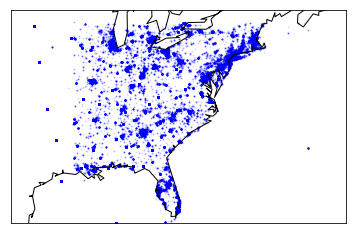

In [7]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123)
# map tweets
from mpl_toolkits.basemap import Basemap
# east
geo_bounds = [[24.4, 44.9], [-100, -60.5]]
# east coast
# geo_bounds = [[26.1, 42.4], [-90.2, -67.9]]
geo_map = Basemap(llcrnrlat=geo_bounds[0][0], llcrnrlon=geo_bounds[1][0], urcrnrlat=geo_bounds[0][1], urcrnrlon=geo_bounds[1][1], projection='merc')
sample_size = 100000
geotag_data_sample = geotag_data.loc[np.random.choice(geotag_data.index, sample_size, replace=False), :]
x, y = geo_map(geotag_data_sample.loc[:, 'lon'].values, geotag_data_sample.loc[:, 'lat'].values)
geo_map.drawcoastlines()
geo_map.scatter(x, y, alpha=0.1, c='b', s=1.)
plt.show()

The data aren't just along the East Coast, but that's certainly the densest part of the distribution.

Let's sanity-check the subsets that we pulled for Michael (Florida) and Florence (North/South Carolina).

In [23]:
import gzip
def process_archive_file_gzip(file_name):
    data = []
    with gzip.open(file_name) as file_input:
        for i, x in enumerate(file_input):
            x = x.decode('utf-8')
            x_lat, x_lon, x_id, x_user, x_status, x_time = process_status_line(x)
            data.append([x_lat, x_lon, x_time, x_status])
            if(i % 1000000 == 0):
                print('processed %d tweets'%(i))
    data = pd.DataFrame(data)
    data.columns = ['lat', 'lon', 'date', 'txt']
    return data
michael_geo_file_name = '../../data/mined_tweets/east_coast_geo_twitter_2018/east_coast_geo_twitter_2018_clean_.*_24.7,34.9_-88.3,-75.3_07-10-18_00:00:00-23-10-18_23:59:59.gz'
florence_geo_file_name = '../../data/mined_tweets/east_coast_geo_twitter_2018/east_coast_geo_twitter_2018_clean_.*_31.0,36.6_-85.0,-76.6_30-08-18_00:00:00-26-09-18_23:59:59.gz'
michael_data = process_archive_file_gzip(michael_geo_file_name)
florence_data = process_archive_file_gzip(florence_geo_file_name)
print('%d tweets from Michael area/time'%(len(michael_data)))
print('%d tweets from Florence area/time'%(len(florence_data)))

processed 0 tweets
processed 1000000 tweets
processed 2000000 tweets
processed 0 tweets
processed 1000000 tweets
2957340 tweets from Michael area/time
1582788 tweets from Florence area/time


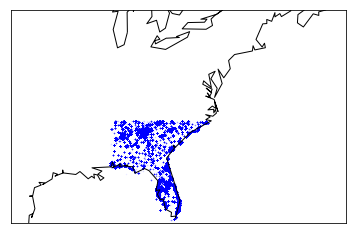

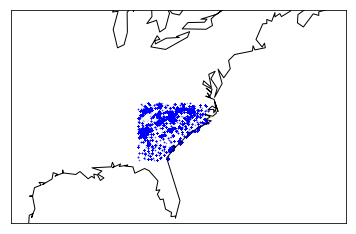

In [22]:
def plot_lat_lon(data, geo_bounds):
    geo_map = Basemap(llcrnrlat=geo_bounds[0][0], llcrnrlon=geo_bounds[1][0], urcrnrlat=geo_bounds[0][1], urcrnrlon=geo_bounds[1][1], projection='merc')
    sample_size = 100000
    data_sample = data.loc[np.random.choice(data.index, sample_size, replace=False), :]
    x, y = geo_map(data.loc[:, 'lon'].values, data.loc[:, 'lat'].values)
    geo_map.drawcoastlines()
    geo_map.scatter(x, y, alpha=0.001, c='b', s=1., marker='o')
    plt.show()
# east U.S.
geo_bounds = [[24.4, 44.9], [-100, -60.5]]
plot_lat_lon(michael_data, geo_bounds)
plot_lat_lon(florence_data, geo_bounds)

This looks like pretty good coverage! Can we get an estimate of how many of the tweets were about the hurricanes?

In [26]:
import re
michael_matcher = re.compile('#hurricanemichael|hurricane michael|#michael')
florence_matcher = re.compile('#hurricaneflorence|hurricane florence|#florence')
michael_data_hurricane = michael_data[michael_data.loc[:, 'txt'].apply(lambda x: michael_matcher.search(x.lower()) is not None)]
florence_data_hurricane = florence_data[florence_data.loc[:, 'txt'].apply(lambda x: florence_matcher.search(x.lower()) is not None)]
print('%d relevant Michael tweets'%(michael_data_hurricane.shape[0]))
print('%d relevant Florence tweets'%(florence_data_hurricane.shape[0]))

10256 relevant Michael tweets
14701 relevant Florence tweets


This is OK but not good enough. Can we expand by including extra hashtags?

In [29]:
from functools import reduce
import pandas as pd
hashtag_matcher = re.compile('#[0-9A-Za-z_]+')
michael_data_hashtags = pd.Series(list(reduce(lambda x,y: x+y, michael_data_hurricane.loc[:, 'txt'].apply(lambda x: hashtag_matcher.findall(x.lower())).values)))
florence_data_hashtags = pd.Series(list(reduce(lambda x,y: x+y, florence_data_hurricane.loc[:, 'txt'].apply(lambda x: hashtag_matcher.findall(x.lower())).values)))
michael_data_hashtag_counts = michael_data_hashtags.value_counts()
florence_data_hashtag_counts = florence_data_hashtags.value_counts()
print(michael_data_hashtag_counts.head(20))
print(florence_data_hashtag_counts.head(20))

#hurricanemichael        5203
#michael                 1317
#florida                  497
#hurricanemichael2018     429
#michaeltlh               384
#hurricane                330
#panamacity               211
#flwx                     201
#home                     167
#beach                    144
#golf                     137
#tallahassee              125
#michaelmyers             110
#mexicobeach              108
#weather                  107
#floridastrong             92
#gawx                      90
#panamacitybeach           89
#georgia                   77
#850strong                 73
dtype: int64
#hurricaneflorence        6324
#florence                 4272
#hurricaneflorence2018     961
#florencenc                610
#ncwx                      479
#northcarolina             431
#florencehurricane2018     430
#hurricane                 393
#wilmingtonnc              260
#nc                        215
#wral                      184
#wilmington                171
#scwx          

In [31]:
michael_hashtags_expanded = ['#hurricanemichael', '#michael', '#hurricane', '#floridastrong']
florence_hashtags_expanded = ['#hurricaneflorence', '#florence', '#florencehurricane', '#flooding', '#tropicalstormflorence', '#hurricane']
michael_phrases = michael_hashtags_expanded + ['hurricane michael'] 
florence_phrases = florence_hashtags_expanded + ['hurricane florence']
michael_matcher = re.compile('|'.join(michael_phrases))
florence_matcher = re.compile('|'.join(florence_phrases))
michael_data_hurricane_expanded = michael_data[michael_data.loc[:, 'txt'].apply(lambda x: michael_matcher.search(x.lower()) is not None)]
florence_data_hurricane_expanded = florence_data[florence_data.loc[:, 'txt'].apply(lambda x: florence_matcher.search(x.lower()) is not None)]
print('%d Michael expanded'%(len(michael_data_hurricane_expanded)))
print('%d Florence expanded'%(len(florence_data_hurricane_expanded)))

11255 Michael expanded
15743 Florence expanded


Still too small! What about mining for keywords (as compared to a background corpus)? E.g. find words with high relative frequency such that $f'(w) = \frac{f(w)}{f_{0}(w)}$. Or honestly we might be better off trying a topic model over the whole corpus, finding the topic with "hurricane words" and then querying on that.

The optimal study design might be (1) gather geo-tagged corpus (2) filter spambots etc. (3) identify NEs (4) track frequency, semantics/context (5) identify volatile NEs and associated tweets as more important/needing attention (6) identify people with semantically volatile NEs as possible locals or stakeholders (7) sub-groups of semantically volatile NEs (ambiguous locations vs. well-established, small vs. big, locations vs. people, etc.).

## Test tagged data
Now that we've tagged Maria/etc. data for NEs, let's see what the distribution looks like over space/time.

In [51]:
import gzip
import re
# extract NEs first
def extract_NEs_from_tags(token_tags):
    """
    Extract NEs from text. If we're using BIO then 
    that requires a different set of rules than just IO.
    
    :param token_tags: list of token/tag tuples
    :returns NE_list: extracted NEs
    """
    use_bio = len(set([tag.split('-')[0] for token, tag in token_tags]) & set(['B','I','U','E'])) > 0
    NE_list = []
    if(use_bio):
        previous_state = "O"
        entity_start = 0
        for i, (token, tag) in enumerate(token_tags):
            state = tag.split('-')[0]
            if(state in ("B", "U") or
               (state in ("I", "E") and previous_state not in ("B", "I"))):
                entity_start = i
            if(state in ("E", "U") or
               (state in ("B", "I") and (i == len(token_tags) - 1 or token_tags[i + 1][1].split('-')[0] not in ("I", "E")))):
                entity_type = tag.split('-')[1]
                NE_combined_token = ' '.join([x[0] for x in token_tags[entity_start:i+1]])
                if entity_type is not None:
                    NE_list.append((NE_combined_token, entity_type))
                entity_start = None
            previous_state = state
    else:
        NE_curr = []
        tag_curr = ''
        for i, (token, tag) in enumerate(token_tags):
            if(tag != 'O'):
                if(tag == tag_curr or tag_curr == ''):
                    NE_curr.append(token)
            if(tag != tag_curr and tag_curr != ''):
                if(len(NE_curr) > 0):
                    NE_curr_str = ' '.join(NE_curr)
                    NE_curr = (NE_curr_str, tag_curr)
                    NE_list.append(NE_curr)
                    NE_curr = []
                if(tag != 'O'):
                    NE_curr.append(token)
            tag_curr = tag
        if(len(NE_curr) > 0):
            NE_curr = (' '.join(NE_curr), tag_curr)
            NE_list.append(NE_curr)
    return NE_list

token_tag_matcher = re.compile('([^ ]+)/([^ ]+)')
def extract_NEs_from_file(f):
    NE_list = []
    for l in gzip.open(f, 'r'):
        l_txt = l.decode('utf-8').strip()
        l_token_tags = token_tag_matcher.findall(l_txt)
        NE_l = extract_NEs_from_tags(l_token_tags)
        NE_list.append(NE_l)
    return NE_list

In [ ]:
%%capture tag_output
import pandas as pd
import os
tag_files = [
    # Maria
    '../../data/mined_tweets/archive_maria_txt_tags.gz', '../../data/mined_tweets/stream_maria_txt_tags.gz', 
    # Harvey
    '../../data/mined_tweets/archive_harvey_txt_tags.gz', '../../data/mined_tweets/stream_harvey_txt_tags.gz', 
    # Irma
    '../../data/mined_tweets/archive_irma_txt_tags.gz', '../../data/mined_tweets/stream_irma_txt_tags.gz', 
    # Florence
    '../../data/mined_tweets/archive_florence_txt_tags.gz', '../../data/mined_tweets/east_coast_geo_twitter_2018/geo_stream_florence_txt_tags.gz', 
    # Michael
    '../../data/mined_tweets/archive_michael_txt_tags.gz', '../../data/mined_tweets/east_coast_geo_twitter_2018/geo_stream_michael_txt_tags.gz', 
]
for tag_file in tag_files:
    print('reading file %s'%(os.path.basename(tag_file)))
    NE_list = extract_NEs_from_file(tag_file)
    NE_list_valid = [x for x in NE_list if len(x) > 0]
    NE_list_valid_loc = [x for x in NE_list if len([y for y in x if y[1]=='LOCATION']) > 0]
    print('%d/%d statuses with at least one NE'%(len(NE_list_valid), len(NE_list)))
    print('%d/%d statuses with at least one NE-LOC'%(len(NE_list_valid_loc), len(NE_list)))
    NE_data = pd.DataFrame(list(reduce(lambda x,y: x+y, NE_list)))
    NE_data.columns = ['NE_name', 'NE_type']
    NE_data_counts = NE_data.loc[:, 'NE_name'].value_counts()
    display(NE_data_counts.head(20))
    NE_data_loc = NE_data[NE_data.loc[:, 'NE_type']=='LOCATION']
    display(NE_data_loc.loc[:, 'NE_name'].value_counts().head(20))
    # NE_list_combined_counts = NE_list_combined.loc
    # print(NE_list_combined_counts.head(50))

In [67]:
tag_output.show()

reading file archive_maria_txt_tags.gz
17156/41665 statuses with at least one NE
7365/41665 statuses with at least one NE-LOC
reading file stream_maria_txt_tags.gz
121746/328013 statuses with at least one NE
62508/328013 statuses with at least one NE-LOC
reading file archive_harvey_txt_tags.gz
35006/63089 statuses with at least one NE
28320/63089 statuses with at least one NE-LOC
reading file stream_harvey_txt_tags.gz
493519/977170 statuses with at least one NE
381221/977170 statuses with at least one NE-LOC
reading file archive_irma_txt_tags.gz
25873/62565 statuses with at least one NE
21098/62565 statuses with at least one NE-LOC
reading file stream_irma_txt_tags.gz
271280/652723 statuses with at least one NE
168203/652723 statuses with at least one NE-LOC
reading file archive_florence_txt_tags.gz
7612/19835 statuses with at least one NE
6737/19835 statuses with at least one NE-LOC
reading file geo_stream_florence_txt_tags.gz
5409/9150 statuses with at least one NE
3723/9150 statuses

#PuertoRico                      2407
Puerto Rico                      1907
Trump                            1038
Mr                                875
Congress                          576
San Juan                          539
Dominica                          501
Maria                             486
#Mexico                           245
100 %                             235
#Dominica                         216
Trump's                           214
Hurricane                         212
They                              209
FEMA                              202
Please make #PuertoRico trend     185
without power and can             185
Unprecedented levels              184
t tweet it themselves             184
5                                 167
Name: NE_name, dtype: int64

#PuertoRico       2292
Puerto Rico       1297
San Juan           487
Dominica           449
#Mexico            245
#Dominica          210
America            126
Florida            124
USA                117
Norfolk            100
West Virginia      100
US                  92
Virginia            87
Mexico              80
#Maria              78
Vieques             77
Texas               68
#Cuba               49
Virgin Islands      48
Hurricane           43
Name: NE_name, dtype: int64

#PuertoRico    21488
Puerto Rico    11409
Trump           8897
Maria           4760
huracán         3903
San Juan        3260
#Mexico         1911
Congress        1911
America         1885
/ / bit         1805
US              1732
Dominica        1530
Katrina         1459
Florida         1423
twitter         1257
#Dominica       1179
#puertorico     1168
USA             1165
Irma            1114
María            996
Name: NE_name, dtype: int64

#PuertoRico       19205
Puerto Rico        8064
San Juan           2832
#Mexico            1911
America            1875
US                 1655
Dominica           1384
Florida            1319
#Dominica          1159
USA                1156
#puertorico        1010
Mexico              741
Texas               715
#Maria              708
United States       609
#Florida            580
Wall Street         540
White House         438
#Harvey             427
Virgin Islands      390
Name: NE_name, dtype: int64

#Harvey             14704
Texas                5822
Houston              4896
#Houston             1384
Trump                1364
TX                   1053
Twitter               684
America               630
Harvey                462
Hurricane Harvey      447
RED CROSS             447
Rockport              385
Mexico                337
HOUSTON               327
Hurricane             324
Louisiana             323
Jefferson             302
Chambers              299
Brian Roberson        261
Trump Proclaims       240
Name: NE_name, dtype: int64

#Harvey            14519
Texas               5822
Houston             4895
#Houston            1384
TX                  1053
America              630
RED CROSS            447
Rockport             385
Mexico               337
HOUSTON              327
Hurricane            324
Louisiana            323
Galveston            224
Austin               203
Buffalo Bayou        187
Beaumont             140
Florida              133
Campbell center      127
Port Aransas         122
Red Cross            110
Name: NE_name, dtype: int64

#Harvey             180042
Texas                74833
Houston              47159
#Houston             20308
Harvey               14238
#harvey              14098
TX                   12599
Trump                12262
Hurricane Harvey      9033
huracán               8454
Rockport              5723
Louisiana             5000
America               3783
God                   3667
twitter               3575
Red Cross             3539
Austin                3438
Katrina               3406
Mexico                3087
Twitter               3039
Name: NE_name, dtype: int64

#Harvey         179571
Texas            69423
Houston          46293
#Houston         20295
#harvey          14004
TX               12562
Rockport          5290
Louisiana         4995
America           3782
Red Cross         3526
Austin            3437
Mexico            3078
Hurricane         2892
San Antonio       2262
Galveston         2096
#houston          2072
Dallas            1892
Florida           1830
Port Aransas      1669
USA               1586
Name: NE_name, dtype: int64

Florida            6504
Miami              2576
Irma               2177
#Irma               834
FL                  833
Cuba                790
#Florida            764
Hurricane           715
Key West            632
#Harvey             568
Ohio                530
Naples              502
Tampa               377
#Cuba               360
#Miami              345
South Florida       334
Puerto Rico         333
Tampa Bay           316
Foot Locker         270
Fort Lauderdale     264
Name: NE_name, dtype: int64

Florida            6504
Miami              2576
FL                  833
Cuba                790
#Florida            757
#Irma               738
Hurricane           715
Key West            632
#Harvey             566
Ohio                530
Naples              502
Tampa               377
#Cuba               360
#Miami              342
Puerto Rico         332
Tampa Bay           316
Fort Lauderdale     264
Mexico              263
Orlando             262
Georgia             240
Name: NE_name, dtype: int64

Florida          48545
Irma             22598
huracán          14544
#Florida         11296
Miami            10566
Cuba              8460
FL                6546
#Harvey           5814
#Irma             5620
Puerto Rico       4778
5                 3702
South Florida     3509
Huracán           3472
#Cuba             3432
Tampa             2673
Caribe            2602
Key West          2509
God               2424
Trump             2324
Orlando           2314
Name: NE_name, dtype: int64

Florida        45317
#Florida       11263
Miami           8360
Cuba            6380
FL              6344
#Harvey         5790
#Irma           4792
#Cuba           3432
Puerto Rico     2824
Tampa           2561
Caribe          2451
Key West        2412
Orlando         2219
Georgia         1916
#Miami          1829
Hurricane       1710
Antigua         1598
Texas           1450
Mexico          1372
GA              1361
Name: NE_name, dtype: int64

#Florence             3222
North Carolina        1000
NC                     541
South Carolina         376
Florence               373
America                260
Wilmington             251
Wrightsville Beach     208
Virginia               194
Hurricane              160
New Bern               153
SC                     138
#florence              127
East Coast             123
CNN                    114
Trump                   94
Georgia                 71
Hurricane Florence      55
Storm Center            50
Puerto Rico             50
Name: NE_name, dtype: int64

#Florence             3202
North Carolina        1000
NC                     541
Florence               373
South Carolina         359
America                260
Wilmington             251
Wrightsville Beach     208
Virginia               194
Hurricane              160
New Bern               153
SC                     138
#florence              125
East Coast             123
Georgia                 71
Storm Center            50
Puerto Rico             50
VA                      43
#Hurricane              35
Morehead City           34
Name: NE_name, dtype: int64

#Michael             1229
Florida              1048
Michael               449
Panama City           328
#michael              273
FL                    202
Georgia               181
Mexico Beach          176
#Florida              157
Tallahassee           148
Panama City Beach     116
Mexico                 97
#Georgia               72
Bay County             70
Michael Karacson       67
#Tallahassee           54
North Carolina         50
Mishawaka              50
GA                     49
Marianna               48
Name: NE_name, dtype: int64

Florida              1048
Panama City           328
FL                    202
Georgia               181
Mexico Beach          176
#Florida              157
Tallahassee           148
Panama City Beach     116
Mexico                 97
#Georgia               72
Bay County             70
#Tallahassee           54
North Carolina         50
Mishawaka              50
GA                     49
Marianna               48
Alabama                47
#florida               42
#mexico                40
South Carolina         39
Name: NE_name, dtype: int64

#Michael             1243
Florida               907
FL                    256
Panama City           229
Panama City Beach     204
Mexico Beach          199
#Florida              195
Mexico                188
Michael               174
Georgia               150
Hurricane             105
Beach                  97
#Georgia               93
Facebook               68
#michael               62
Gulf Coast             59
Tallahassee            45
Stefan Melendez        44
Trump                  37
#Hurricane             29
Name: NE_name, dtype: int64

Florida              907
FL                   256
Panama City          229
Panama City Beach    204
Mexico Beach         199
#Florida             195
Mexico               188
Georgia              150
Hurricane            105
Beach                 97
#Georgia              93
Gulf Coast            49
Tallahassee           45
Alabama               29
South Carolina        25
Fl                    24
#Hurricane            21
#hurricane            21
Congress              19
US                    18
Name: NE_name, dtype: int64

#Michael             1229
Florida              1048
Michael               449
Panama City           328
#michael              273
FL                    202
Georgia               181
Mexico Beach          176
#Florida              157
Tallahassee           148
Panama City Beach     116
Mexico                 97
#Georgia               72
Bay County             70
Michael Karacson       67
#Tallahassee           54
North Carolina         50
Mishawaka              50
GA                     49
Marianna               48
Name: NE_name, dtype: int64

Florida              1048
Panama City           328
FL                    202
Georgia               181
Mexico Beach          176
#Florida              157
Tallahassee           148
Panama City Beach     116
Mexico                 97
#Georgia               72
Bay County             70
#Tallahassee           54
North Carolina         50
Mishawaka              50
GA                     49
Marianna               48
Alabama                47
#florida               42
#mexico                40
South Carolina         39
Name: NE_name, dtype: int64

NEs in general are not great but the locations make sense! I wonder how much of the "tagger" was a stack of regexes.

### NE trajectory over time

Now let's get the frequency trajectories for these NEs over time. This means reconnecting with status data and timestamps, etc. BLAH

In [359]:
import gzip
import pandas as pd
import dateutil.parser
tag_files = [
    # Maria
    '../../data/mined_tweets/archive_maria_txt_tags.gz', '../../data/mined_tweets/stream_maria_txt_tags.gz', '../../data/mined_tweets/historical_maria_txt_tags.gz',
    # Harvey
    '../../data/mined_tweets/archive_harvey_txt_tags.gz', '../../data/mined_tweets/stream_harvey_txt_tags.gz', '../../data/mined_tweets/historical_harvey_txt_tags.gz',
    # Irma
    '../../data/mined_tweets/archive_irma_txt_tags.gz', '../../data/mined_tweets/stream_irma_txt_tags.gz', '../../data/mined_tweets/historical_irma_txt_tags.gz',
    # Florence
    '../../data/mined_tweets/archive_florence_txt_tags.gz', '../../data/mined_tweets/east_coast_geo_twitter_2018/geo_stream_florence_txt_tags.gz', '../../data/mined_tweets/historical_florence_txt_tags.gz',
    # Michael
    '../../data/mined_tweets/archive_michael_txt_tags.gz', '../../data/mined_tweets/east_coast_geo_twitter_2018/geo_stream_michael_txt_tags.gz', '../../data/mined_tweets/historical_michael_txt_tags.gz',
]
def process_status_line(x):
    """
    Process tab-separated status line.
    
    :param x: string containing status information
    :returns x_id::
    :returns x_username::
    :returns x_date::
    :returns x_retweets::
    :returns x_favorites::
    :returns x_lang::
    """
    x_line = x.strip().split('\t')
    x_id, x_username, x_date, x_retweets, x_favorites, x_lang = x_line
    x_id = int(x_id)
    x_date = dateutil.parser.parse(x_date)
    x_retweets = int(x_retweets)
    x_favorites = int(x_favorites)
    return x_id, x_username, x_date, x_retweets, x_favorites, x_lang
def process_status_txt_tags(f):
    """
    Extract status, text and tag information from files.
    """
    f_name = os.path.basename(f).replace('_txt_tags.gz', '')
    f_name_fixed = f_name.split('_')[-1]
    print('processing file %s'%(f_name))
    f_status = f.replace('_txt_tags.gz', '_status.gz')
    f_txt = f.replace('_txt_tags.gz', '_txt.txt')
    NE_list = extract_NEs_from_file(f)
    f_status = pd.DataFrame([process_status_line(x) for x in gzip.open(f_status, 'rt')], columns=['id', 'username', 'date', 'retweets', 'favorites', 'lang'])
    f_txt = pd.DataFrame([x for x in open(f_txt)], columns=['txt'])
    f_combined = pd.concat([f_status, f_txt], axis=1)
    f_combined.loc[:, 'NE_list'] = pd.Series(NE_list)
    f_combined.loc[:, 'data_name'] = f_name
    f_combined.loc[:, 'data_name_fixed'] = f_name_fixed
#     print('combined data shape %s'%(str(f_combined.shape)))
#     display(f_combined.head())
    return f_combined
combined_tag_data = []
for f in tag_files:
    f_combined = process_status_txt_tags(f)
    combined_tag_data.append(f_combined)
combined_tag_data = pd.concat(combined_tag_data, axis=0)
# remove nan data
combined_tag_data = combined_tag_data[~combined_tag_data.loc[:, 'id'].apply(lambda x: type(x) is float and np.isnan(x))]
# convert date stamp to float for binning
combined_tag_data.loc[:, 'date_stamp'] = combined_tag_data.loc[:, 'date'].apply(lambda x: x.timestamp())

processing file archive_maria
combined data shape (41902, 10)


,id,username,date,retweets,favorites,lang,txt,NE_list,data_name,data_name_fixed
0,9.140303e+17,EmeraidKatNJ,2017-09-30 07:33:06+00:00,0.0,0.0,en,RT @chefjoseandres: Quick update from #PuertoR...,[],archive_maria,maria
1,9.140313e+17,X_RATED25,2017-09-30 07:37:04+00:00,0.0,0.0,en,#Support #Purchase @X_RATED25 Single (#DontHa...,[],archive_maria,maria
2,9.140316e+17,D_McCaughan,2017-09-30 07:38:20+00:00,0.0,0.0,en,RT @Scavino45: POTUS' @realDonaldTrump on Hurr...,"[(#PuertoRico, LOCATION), (Instagram, ORGANIZA...",archive_maria,maria
3,9.140318e+17,eccolabella,2017-09-30 07:38:56+00:00,0.0,0.0,en,RT @altNOAA: .@realDonaldTrump If you can't ge...,[],archive_maria,maria
4,9.140322e+17,CorinaRey,2017-09-30 07:40:39+00:00,0.0,0.0,en,RT @altNOAA: According to #PuertoRico governme...,"[(#PuertoRico, LOCATION)]",archive_maria,maria


processing file stream_maria
combined data shape (314855, 10)


,id,username,date,retweets,favorites,lang,txt,NE_list,data_name,data_name_fixed
0,903044352548773888,DrDisdier,2017-08-30 19:58:00,0,1,es,"@JPAL_NA ""Creando puentes entre el gobierno y ...",[],stream_maria,maria
1,903043144727580672,NotiPuertoRico,2017-08-30 19:53:00,0,0,es,Puerto Rico protesta contra medidas de austeri...,"[(Puerto Rico, COUNTRY), (Caribe, LOCATION)]",stream_maria,maria
2,903043143112806400,NotiPuertoRico,2017-08-30 19:53:00,0,0,es,Millonaria demanda contra OMB se ventilará en ...,"[(OMB, ORGANIZATION), (Puerto Rico, COUNTRY), ...",stream_maria,maria
3,903041600837713921,ShowTuFli,2017-08-30 19:47:00,0,0,en,New music every week real soon! The clip full!...,[],stream_maria,maria
4,903041212902461440,sammysamuelrios,2017-08-30 19:46:00,0,0,es,#WEDDINGPHOTOGRAPHY #puertorico <URL>\n,[],stream_maria,maria


processing file historical_maria
combined data shape (46387, 10)


,id,username,date,retweets,favorites,lang,txt,NE_list,data_name,data_name_fixed
0,917177725298888704,Papirodil,2017-10-08 19:59:44,1,1,en,Life post #HurricaneMaria : I'm yet to see any...,[],historical_maria,maria
1,917177359211679744,Ive120,2017-10-08 19:58:17,0,0,es,Día #18 #HuracánMaría #PRSeLevanta <URL>\n,"[(# 18, MONEY)]",historical_maria,maria
2,917177169415213061,Papirodil,2017-10-08 19:57:32,1,0,en,The garbage in the street SMELLS REALLY BAD. A...,[],historical_maria,maria
3,917176998501392384,lucarenda,2017-10-08 19:56:51,1,9,en,With PM @SkerritR and @UN SG @antonioguterres ...,"[(#Dominica, LOCATION)]",historical_maria,maria
4,917176951512621056,condadoinsider,2017-10-08 19:56:40,1,1,en,The famous Ceiba tree in the town Quebradillas...,[],historical_maria,maria


processing file archive_harvey
combined data shape (63273, 10)


,id,username,date,retweets,favorites,lang,txt,NE_list,data_name,data_name_fixed
0,8.977526e+17,RestaurantsinSA,2017-08-16 09:31:11+00:00,0.0,0.0,en,Gather the Girls! It's #Wednesday #LadiesNigh...,[],archive_harvey,harvey
1,8.977571e+17,Labcold,2017-08-16 09:48:55+00:00,0.0,0.0,en,RT @Laird_Admiral: @Labcold @ConversationUK Es...,[],archive_harvey,harvey
2,8.977637e+17,HarlowJCP,2017-08-16 10:15:28+00:00,0.0,0.0,en,#HelpWanted bb’s #HarveyCentre #Harlow <URL>\n,[],archive_harvey,harvey
3,8.982654e+17,Smatthews87Wx,2017-08-17 19:28:49+00:00,0.0,0.0,en,RT @StanfieldTyler: AF recon mission has confi...,[],archive_harvey,harvey
4,8.982732e+17,IGRDMexico,2017-08-17 19:59:44+00:00,0.0,0.0,en,RT @hurrtrackerapp: #PTC9 to be upgraded to TS...,[],archive_harvey,harvey


processing file stream_harvey
combined data shape (899607, 10)


,id,username,date,retweets,favorites,lang,txt,NE_list,data_name,data_name_fixed
0,901531320052051971,"#Irma,#HurricaneIrma,#Harvey,#HurricaneHarvey_...",2017-08-26 15:46:00,17069,74324,en,THANK YOU to all of the great volunteers helpi...,"[(Texas, LOCATION)]",stream_harvey,harvey
1,901595108830658560,"#Irma,#HurricaneIrma,#Harvey,#HurricaneHarvey_...",2017-08-26 19:59:00,0,0,en,Y'all can play if y'all want bruh! #HurricaneH...,[],stream_harvey,harvey
2,901480516263792642,"#Irma,#HurricaneIrma,#Harvey,#HurricaneHarvey_...",2017-08-26 12:24:00,286,257,en,Parts of Rockport Fulton High School campus de...,"[(Rockport, LOCATION), (Fulton High School, LO...",stream_harvey,harvey
3,901590092074156033,"#Irma,#HurricaneIrma,#Harvey,#HurricaneHarvey_...",2017-08-26 19:40:00,76,67,en,Tropical Storm #Harvey Advisory 26A: Tropical ...,[],stream_harvey,harvey
4,901595013192310784,"#Irma,#HurricaneIrma,#Harvey,#HurricaneHarvey_...",2017-08-26 19:59:00,177,114,en,If you are affected by #Harvey use @HarveyReli...,"[(#Harvey, LOCATION)]",stream_harvey,harvey


processing file historical_harvey
combined data shape (77532, 10)


,id,username,date,retweets,favorites,lang,txt,NE_list,data_name,data_name_fixed
0,906306046553182209,EPA,2017-09-08 19:59:34,14,28,en,Just the facts: Read about our hurricane respo...,[],historical_harvey,harvey
1,906306030128308225,SDubya7,2017-09-08 19:59:30,0,0,en,"No disrespect to those affected by #Harvey , b...","[(#Harvey, LOCATION)]",historical_harvey,harvey
2,906305948796559361,Jail_Killery,2017-09-08 19:59:11,0,0,en,That's because liberalism is a disease. #maga ...,[],historical_harvey,harvey
3,906305850037469184,sina_matix,2017-09-08 19:58:47,0,0,en,FREE Concert to support Harvey Victims this Sa...,[],historical_harvey,harvey
4,906305832094244865,JustCallMeEd,2017-09-08 19:58:43,1,2,en,Meanwhile worth noting states with high needs ...,"[(#Florida #Harvey #Irma, LOCATION)]",historical_harvey,harvey


processing file archive_irma
combined data shape (62875, 10)


,id,username,date,retweets,favorites,lang,txt,NE_list,data_name,data_name_fixed
0,8.978952e+17,Rafaela15060209,2017-08-16 18:57:57+00:00,0.0,0.0,en,#Irmaosneto #Portugal @felipeneto @FuckNetoo <...,[],archive_irma,irma
1,8.994300e+17,LuLaRoeGinaP,2017-08-21 00:36:28+00:00,0.0,0.0,en,#gowild with this #Azure and #Irma available n...,[],archive_irma,irma
2,9.008198e+17,MattMackowiak,2017-08-24 20:39:22+00:00,0.0,0.0,en,RT @farenthold: Follow for live local updates ...,[],archive_irma,irma
3,9.008330e+17,BobbyJFleming2,2017-08-24 21:31:36+00:00,0.0,0.0,en,RT @DavidPaulKHOU: #Harvey strengthening rapid...,"[(#Harvey, LOCATION), (Houston, LOCATION)]",archive_irma,irma
4,9.008438e+17,richganske,2017-08-24 22:14:24+00:00,0.0,0.0,en,RT @LouisianaGov: .@LouisianaGov declares stat...,"[(#Harvey, LOCATION)]",archive_irma,irma


processing file stream_irma
combined data shape (576880, 10)


,id,username,date,retweets,favorites,lang,txt,NE_list,data_name,data_name_fixed
0,901584264373862406,"#Irma,#HurricaneIrma,#Harvey,#HurricaneHarvey_...",2017-08-26 19:16:00,0,0,en,Texas Gov. Greg Abbott says there is no confir...,"[(Texas Gov, ORGANIZATION), (Greg Abbott, PERS...",stream_irma,irma
1,901579203497340928,"#Irma,#HurricaneIrma,#Harvey,#HurricaneHarvey_...",2017-08-26 18:56:00,8,12,en,While focus on #Harvey ...those in the southea...,"[(Irma, PERSON)]",stream_irma,irma
2,901578985896910848,"#Irma,#HurricaneIrma,#Harvey,#HurricaneHarvey_...",2017-08-26 18:55:00,5,9,en,"Could be talking about Harvey but possibly ""Ir...","[(Harvey, PERSON), (Irma, PERSON)]",stream_irma,irma
3,901577820765343744,"#Irma,#HurricaneIrma,#Harvey,#HurricaneHarvey_...",2017-08-26 18:51:00,1,2,en,Te amo #Irma #Emelly <URL>\n,[],stream_irma,irma
4,901566355161452544,"#Irma,#HurricaneIrma,#Harvey,#HurricaneHarvey_...",2017-08-26 18:05:00,0,3,en,Last 3 names checked off the 2017 Atlantic bas...,[],stream_irma,irma


processing file historical_irma
combined data shape (371267, 10)


,id,username,date,retweets,favorites,lang,txt,NE_list,data_name,data_name_fixed
0,910292401092222977,Ohio_trade87,2017-09-19 19:59:55,1,1,en,USA Smart Watch Phone <URL>\n,"[(USA, LOCATION)]",historical_irma,irma
1,910292399183810560,WTVAJoel,2017-09-19 19:59:55,0,5,en,With so many still without power in Puerto Ric...,"[(Puerto Rico, LOCATION)]",historical_irma,irma
2,910292328744734721,Cool_Bubba,2017-09-19 19:59:38,0,0,en,. @CARICOMorg Glad to see a supportive communi...,[],historical_irma,irma
3,910292247010320384,BeachRentalMobi,2017-09-19 19:59:18,0,1,en,We are well on our way to beautiful days ahead...,[],historical_irma,irma
4,910292205696294912,BethAnnHill2,2017-09-19 19:59:08,0,1,en,TI survived Irma #TIcottage #irma #beachlife @...,"[(TI, LOCATION), (Irma, PERSON), (Island Beach...",historical_irma,irma


processing file archive_florence
combined data shape (19969, 10)


,id,username,date,retweets,favorites,lang,txt,NE_list,data_name,data_name_fixed
0,1034774789519433728,AuthorCharles,2018-08-29 12:08:29+00:00,0,0,en,"I see no end to #traveling#Florence, #ItalyNex...",[],archive_florence,florence
1,1034887809214164993,Pasquale_M_,2018-08-29 19:37:35+00:00,0,0,en,RT @MartinoFirenze: Lots of love to @eduroam f...,[],archive_florence,florence
2,1035000849913786368,TJN_Jobs,2018-08-30 03:06:46+00:00,0,0,en,#JobOpening:#MECA_PROPERTY_MANAGEMENT_LLC #Mai...,[],archive_florence,florence
3,1035072593475325954,girlinflorence,2018-08-30 07:51:51+00:00,0,0,en,A “treat yo self” cappuccino this morning at R...,[],archive_florence,florence
4,1035141858198999042,9QA,2018-08-30 12:27:05+00:00,0,0,en,Invest 90L #I90L will become the 1st #Atlantic...,[],archive_florence,florence


processing file geo_stream_florence
combined data shape (11593, 10)


,id,username,date,retweets,favorites,lang,txt,NE_list,data_name,data_name_fixed
0,1040085458150154240,RobinFox46,2018-09-12 23:51:11-04:00,-1,-1,en,Just some of our team members @FOX46News worki...,"[(Good Day Charlotte, LOCATION)]",geo_stream_florence,florence
1,1040086176705732608,AwakenMen,2018-09-12 23:54:03-04:00,-1,-1,en,Praise the Lord! Florence has weakened a littl...,"[(Florence, LOCATION)]",geo_stream_florence,florence
2,1040086631750029317,KToropin,2018-09-12 23:55:51-04:00,-1,-1,en,Settled in to North Myrtle Beach. ...why are t...,"[(North Myrtle Beach, LOCATION)]",geo_stream_florence,florence
3,1040086759462322176,littlejr88,2018-09-12 23:56:21-04:00,-1,-1,en,Just in case we lose power in the morning via ...,[],geo_stream_florence,florence
4,1040087196173258752,BonnieCarroll13,2018-09-12 23:58:06-04:00,-1,-1,en,Hump day - grind is on!!! #hurricaneflorence20...,"[(Port Wentworth, LOCATION), (Georgia, LOCATION)]",geo_stream_florence,florence


processing file historical_florence
combined data shape (51957, 10)


,id,username,date,retweets,favorites,lang,txt,NE_list,data_name,data_name_fixed
0,1044738115301072897,ai6yrham,2018-09-25 19:59:11,0,3,en,Farmers have been hit hard by #HurricaneFloren...,[],historical_florence,florence
1,1044737858567909376,SCEMD,2018-09-25 19:58:10,34,52,en,The South Carolina Emergency Operations Center...,"[(The South Carolina, LOCATION), (Georgetown, ...",historical_florence,florence
2,1044737287597248518,kimberlysjoy,2018-09-25 19:55:54,0,1,en,@icarry365 #icarry #firstresponders #hurricane...,[],historical_florence,florence
3,1044737245020913667,VFWPost7383,2018-09-25 19:55:44,0,1,en,Next load of relief supplies is packed and rea...,"[(Wilmington, LOCATION)]",historical_florence,florence
4,1044736862693335040,PrescientSite,2018-09-25 19:54:12,0,0,en,"3.4 #Million Chickens and Turkeys and 5,500 Ho...","[(#Florence, LOCATION)]",historical_florence,florence


processing file archive_michael
combined data shape (7360, 10)


,id,username,date,retweets,favorites,lang,txt,NE_list,data_name,data_name_fixed
0,1048546971227705344,amlikethewind,2018-10-06 12:14:13+00:00,0,0,en,@JimCantore #Michael !\n,"[(#Michael, PERSON)]",archive_michael,michael
1,1048590810088857600,MatthewCappucci,2018-10-06 15:08:25+00:00,0,0,en,The disturbance over the #Yucatan is likely to...,"[(#Yucatan, LOCATION)]",archive_michael,michael
2,1048595105064603648,TravelNow24,2018-10-06 15:25:29+00:00,0,0,en,RT @stormpaulpoulos: This will be #Michael &am...,"[(#Michael, PERSON)]",archive_michael,michael
3,1048637601777967104,shashanj60,2018-10-06 18:14:21+00:00,0,0,en,RT @ToddKimberlain: I realize that all eyes wi...,"[(#Michael, PERSON)]",archive_michael,michael
4,1048672821323452418,MackieMet,2018-10-06 20:34:18+00:00,0,0,en,Trouble is brewing in the Gulf... These shower...,[],archive_michael,michael


processing file geo_stream_michael
combined data shape (6673, 10)


,id,username,date,retweets,favorites,lang,txt,NE_list,data_name,data_name_fixed
0,1.048802e+18,VigilanteArtist,2018-10-07 01:06:15-04:00,-1.0,-1.0,en,because the night belongs to lovers... #Florid...,[],geo_stream_michael,michael
1,1.048898e+18,BitesandBrushes,2018-10-07 07:30:16-04:00,-1.0,-1.0,en,Celebrate Creatively #OurPaintersAreBetterThan...,[],geo_stream_michael,michael
2,1.048901e+18,ChristyMRojas,2018-10-07 07:40:40-04:00,-1.0,-1.0,en,Are you watching Florida? If you’re like me yo...,"[(Florida, LOCATION), (#Michael, PERSON)]",geo_stream_michael,michael
3,1.048906e+18,rgsappraisal,2018-10-07 08:01:03-04:00,-1.0,-1.0,en,#Goodmorningworld #sunrise #stormsbrewing #hol...,[],geo_stream_michael,michael
4,1.048910e+18,ActivistFreak,2018-10-07 08:16:08-04:00,-1.0,-1.0,en,About last night... @GentsFoundation at the 7t...,"[(Atlanta, LOCATION)]",geo_stream_michael,michael


processing file historical_michael
combined data shape (45975, 10)


,id,username,date,retweets,favorites,lang,txt,NE_list,data_name,data_name_fixed
0,1054522280741490688,Moore_Agency,2018-10-22 19:57:58,3,4,en,We’re touched by the generosity of @FLKidCare ...,[],historical_michael,michael
1,1054521130235674624,drgabycora,2018-10-22 19:53:24,0,2,en,How about #FLORIDA ? Have you helped as many #...,[],historical_michael,michael
2,1054521087084687361,pharLap9,2018-10-22 19:53:13,0,0,en,#HurricaneMichael Unearths Ships Destroyed in ...,[],historical_michael,michael
3,1054520852371382278,odiearts,2018-10-22 19:52:17,0,0,en,Florida - will be voting early despite having ...,"[(Florida, LOCATION)]",historical_michael,michael
4,1054520532740268032,JimmyPatronis,2018-10-22 19:51:01,114,132,en,Another person called to let me know a contrac...,[],historical_michael,michael


In [360]:
print('%d statuses'%(combined_tag_data.shape[0]))

2597979 statuses


Let's segment each dataset by time, using (1) fixed-width and (2) percentile time slices.

In [361]:
def bin_data_by_time(data, N_bins=5, data_name_col='data_name_fixed'):
    pct_chunk = 100/N_bins
    data_time = []
    for data_name_i, data_i in data.groupby(data_name_col):
        # fixed-width
        date_bins = np.linspace(data_i.loc[:, 'date_stamp'].min(), data_i.loc[:, 'date_stamp'].max()+1., num=N_bins+1)
        data_i.loc[:, 'date_stamp_fixed_bin'] = np.digitize(data_i.loc[:, 'date_stamp'], date_bins)
    #     print(data_i.loc[:, 'date_stamp_fixed_bin'].value_counts())
        # percentiles
        data_i.sort_values('date_stamp', inplace=True, ascending=True)
        date_pct_bins = [np.percentile(data_i.loc[:, 'date_stamp'].values, i*pct_chunk) for i in range(N_bins)]
        data_i.loc[:, 'date_stamp_pct_bin'] = np.digitize(data_i.loc[:, 'date_stamp'], date_pct_bins)
    #     print(data_i.loc[:, 'date_stamp_pct_bin'].value_counts())
        # drop duplicates!!
        data_i.drop_duplicates('id', inplace=True)
        data_i.drop_duplicates('txt', inplace=True)
        data_time.append(data_i)
    data_time = pd.concat(data_time)
    return data_time
N_bins = 5
combined_tag_data_time = bin_data_by_time(combined_tag_data, N_bins=N_bins)
print('%d/%d statuses'%(combined_tag_data_time.shape[0], combined_tag_data.shape[0]))

/hg190/istewart6/miniconda3/envs/crisis_language/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/hg190/istewart6/miniconda3/envs/crisis_language/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/hg190/istewart6/miniconda3/envs/crisis_language/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

1890317/2597979 statuses


Convert each time period's NEs => DTM => normalize by total words => look for (1) frequency trends among most popular NEs, (2) growth/decline patterns, (3) volatility.

In [362]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize.casual import TweetTokenizer
from functools import reduce
import re

# get rid of leading/lagging underscores?? OK
UNDERSCORE_MATCHER = re.compile('^_+|_+$')
def clean_NE(NE):
    NE_clean = UNDERSCORE_MATCHER.sub('', NE).strip().replace(' ','_')
    if(NE_clean.endswith('_')):
        print('bad NE %s -> %s'%(NE, NE_clean))
    return NE_clean

def process_NE_list(NE_list, NE_types=[]):
    if(type(NE_list) is list):
        # testing underscore replacement
#         for y in NE_list:
#             y_fix = UNDERSCORE_MATCHER.sub('', y[0]).strip().replace(' ', '_')
#             if(y_fix.endswith('_')):
#                 print('bad subsitution %s -> %s'%(y[0], y_fix))
        NE_list_str = ' '.join([clean_NE(y[0]) for y in NE_list if (len(NE_types) == 0 or y[1] in NE_types)])
    else:
        NE_list_str = ''
    return NE_list_str

def get_time_normed_DTM(data, time_col, TKNZR, min_df=2, NE_types=[]):
    """
    Compute DTM for NEs in each time bin, 
    normalize by total tokens in time bin.
    
    :param data: tweet DataFrame with NEs, time
    :param time_col: time column
    :param min_df: minimum doc freq in each bin
    :param NE_types: allowed NE types (to count)
    :returns NE_dtm:: time-normed DTM data (row = time bin, col = NE)
    """
    NE_dtm = []
    for date_bin, data_j in data.groupby(time_col):
        cv = CountVectorizer(min_df=min_df, lowercase=True, ngram_range=(1,1))
        NE_j = data_j.loc[:, 'NE_list'].apply(lambda x: process_NE_list(x, NE_types))
        NE_dtm_j = cv.fit_transform(NE_j).sum(axis=0)
#         print('DTM shape %s'%(str(NE_dtm_j.shape)))
        cv_vocab = [x[0] for x in sorted(cv.vocabulary_.items(), key=lambda x: x[1])]
        NE_dtm_j = pd.DataFrame(NE_dtm_j, columns=cv_vocab, index=[date_bin_j])
        # add total tokens
        total_tokens_j = data_j.loc[:, 'txt'].apply(lambda x: len(TKNZR.tokenize(x))).sum()
        # normalize
        NE_dtm_j = NE_dtm_j / total_tokens_j
        # add date stamp
        NE_dtm_j.loc[:, 'DATE_STAMP'] = data_j.loc[:, 'date_stamp'].min()
        NE_dtm.append(NE_dtm_j)
    # add min timestamp as start of time bin
    NE_dtm = pd.concat(NE_dtm, axis=0)
    NE_dtm.fillna(0, inplace=True)
    # this doesn't work?? adds the same date for all indices
#     NE_dtm.loc[:, 'DATE_STAMP'] = data.groupby(time_col).apply(lambda x: x.loc[:, 'date_stamp'].min())
    return NE_dtm
def get_all_time_normed_data(data, name_col='data_name_fixed', fixed_time_col='date_stamp_fixed_bin', pct_time_col='date_stamp_pct_bin', NE_types=[]):
    TKNZR = TweetTokenizer()
    fixed_date_data = []
    pct_date_data = []
    for data_name_i, data_i in data.groupby(name_col):
        print('processing %s data'%(data_name_i))
    ## memory issue! let's group by time 
        ## and compute total frequency in each bin
        ## instead of trying to deal with sparse matrices
        fixed_date_data_i = get_time_normed_DTM(data_i, fixed_time_col, TKNZR, NE_types=NE_types)
        pct_date_data_i = get_time_normed_DTM(data_i, pct_time_col, TKNZR, NE_types=NE_types)
        fixed_date_data_i.loc[:, 'NAME'] = data_name_i
        pct_date_data_i.loc[:, 'NAME'] = data_name_i
        fixed_date_data.append(fixed_date_data_i)
        pct_date_data.append(pct_date_data_i)
    fixed_date_data = pd.concat(fixed_date_data, axis=0)
    pct_date_data = pd.concat(pct_date_data, axis=0)
    fixed_date_data.fillna(0, inplace=True)
    pct_date_data.fillna(0, inplace=True)
    return fixed_date_data, pct_date_data

In [363]:
NE_fixed_date_freq, NE_pct_date_freq = get_all_time_normed_data(combined_tag_data_time)

processing florence data


/hg190/istewart6/miniconda3/envs/crisis_language/lib/python3.6/site-packages/ipykernel_launcher.py:53: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



processing harvey data
processing irma data
processing maria data
processing michael data


/hg190/istewart6/miniconda3/envs/crisis_language/lib/python3.6/site-packages/ipykernel_launcher.py:73: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/hg190/istewart6/miniconda3/envs/crisis_language/lib/python3.6/site-packages/ipykernel_launcher.py:74: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [364]:
# NE_fixed_date_freq.fillna(0, inplace=True)
# NE_pct_date_freq.fillna(0, inplace=True)
display(NE_fixed_date_freq.head())

,00,000,00738,01,02,03,04,041,05,06,...,zora_neale_hurston,zsolt_hermann,zuckerberg,zulia,zurich,zurich_north_america,zurza,ãngel_cruz,último,únete
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000002,0.000002,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [365]:
'austin_' in NE_fixed_date_freq.columns

True

What are the trajectories for the most common entities?

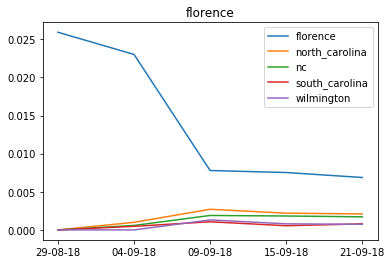

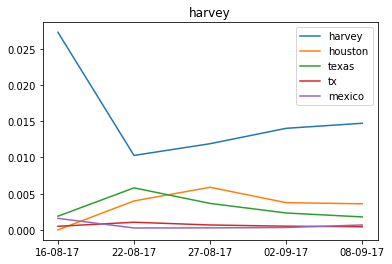

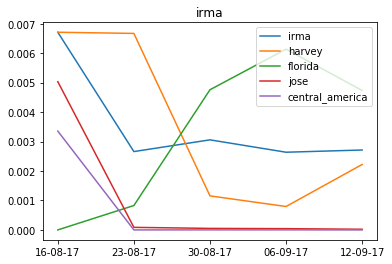

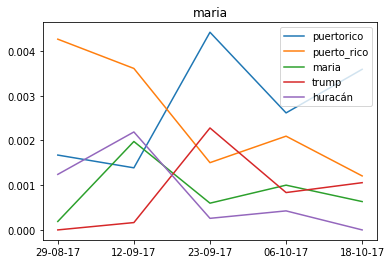

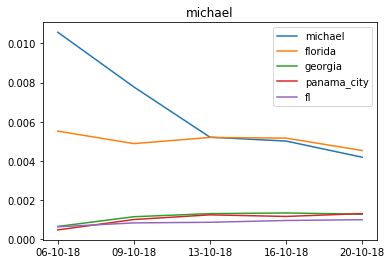

In [367]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
top_k = 5
vocab_cols = list(set(NE_fixed_date_freq.columns) - set(['DATE_STAMP', 'NAME']))
for data_name_i, data_i in NE_fixed_date_freq.groupby('NAME'):
    X = np.arange(data_i.shape[0])
#     print(data_name_i)
    data_i_top_k = data_i.loc[:, vocab_cols].sum(axis=0).sort_values(inplace=False, ascending=False).iloc[:top_k]
#     print(data_i_top_k)
    for data_j_name in data_i_top_k.index:
        plt.plot(X, data_i.loc[:, data_j_name], label=data_j_name)
    plt.legend(loc='upper right')
    # set X ticks
    date_stamps_i = data_i.loc[:, 'DATE_STAMP'].apply(lambda x: datetime.strftime(datetime.fromtimestamp(x), '%d-%m-%y'))
    plt.xticks(X, date_stamps_i)
#     plt.yscale('log')
    plt.title(data_name_i)
    plt.show()
#     break

What are the trajectories for the most steadily-growing and steadily-declining entities?

/hg190/istewart6/miniconda3/envs/crisis_language/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


hurricane_florence    0.976554
horry_county          0.971733
youtube               0.970157
mark                  0.969604
katrina               0.966615
dtype: float64


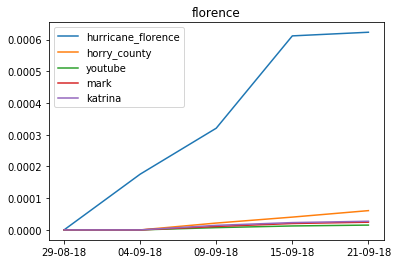

hurricane_center            -0.358421
national_hurricane_center   -0.360147
olivia                      -0.360399
atlantic_ocean              -0.833134
florence                    -0.900114
dtype: float64


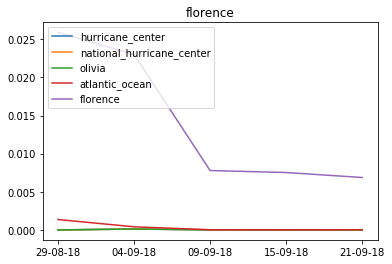

america_    0.996910
dr          0.993866
ga          0.993646
gop         0.993576
georgia     0.992397
dtype: float64


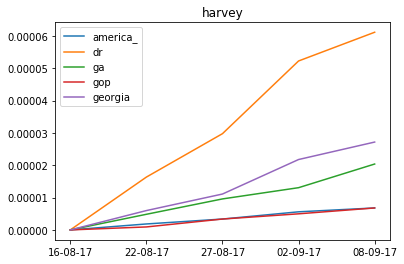

storm_harvey    -0.722986
galveston_      -0.755932
corpuschristi   -0.760177
south_texas     -0.777664
twitter         -0.791529
dtype: float64


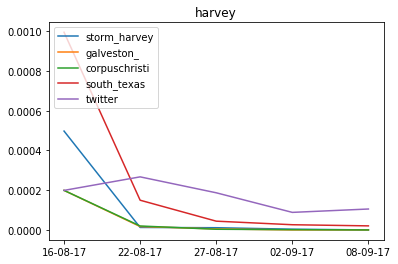

orange_park       0.974460
india             0.974451
hillary           0.974116
the_hurricanes    0.972917
bay_area          0.971813
dtype: float64


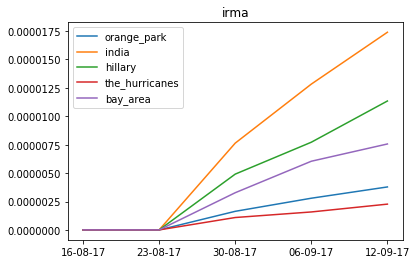

eastern_atlantic   -0.364635
central_america    -0.707101
jose               -0.714237
irma               -0.715469
harvey             -0.796122
dtype: float64


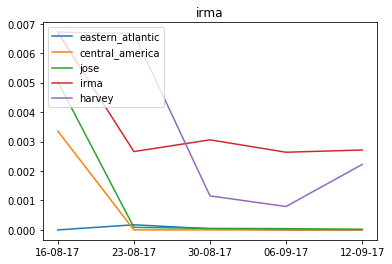

dc                 0.985321
flint              0.967877
it                 0.914724
hurricane_maria    0.876624
fl                 0.876197
dtype: float64


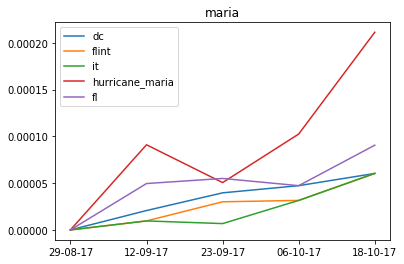

13         -0.920554
100_       -0.921925
carolina   -0.942942
30         -0.948282
jesus      -0.954455
dtype: float64


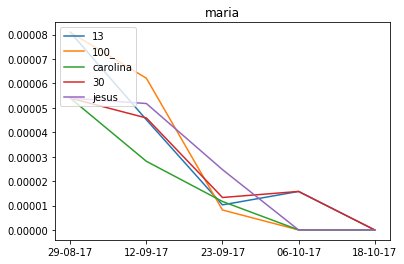

washington     0.987448
port_st_joe    0.986983
calhoun        0.984706
tyndall        0.982799
jackson        0.982739
dtype: float64


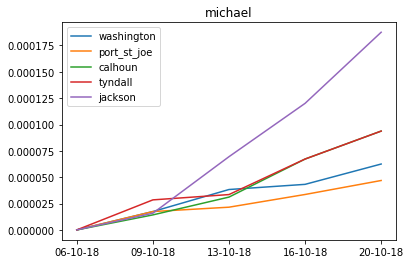

savannah         -0.941871
miami            -0.952275
uk               -0.958895
south_carolina   -0.964517
jesus            -0.978007
dtype: float64


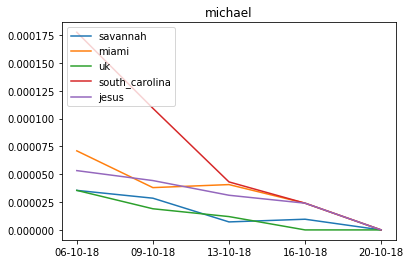

In [368]:
from scipy.stats import spearmanr, pearsonr
top_k = 5
for data_name_i, data_i in NE_fixed_date_freq.groupby('NAME'):
    X = np.arange(data_i.shape[0])
    # compute Pearson growth for all words (consistent growth > monotonic growth)
    corr_i = data_i.loc[:, vocab_cols].apply(lambda x: pearsonr(X, x)[0], axis=0).sort_values(inplace=False, ascending=False)
    corr_i.dropna(inplace=True)
    corr_i_high = corr_i.head(top_k)
    corr_i_low = corr_i.tail(top_k)
#     print(corr_i)
#     print(data_i_top_k) 
    for corr_i_k in [corr_i_high, corr_i_low]:
        print(corr_i_k)
        for data_j_name in corr_i_k.index:
            plt.plot(X, data_i.loc[:, data_j_name], label=data_j_name)
        plt.legend(loc='upper left')
        # set X ticks
        date_stamps_i = data_i.loc[:, 'DATE_STAMP'].apply(lambda x: datetime.strftime(datetime.fromtimestamp(x), '%d-%m-%y'))
        plt.xticks(X, date_stamps_i)
    #     plt.yscale('log')
        plt.title(data_name_i)
        plt.show()
#     break

What if we restrict this to locations only? We'll have to reprocess the NE data...hmph

In [369]:
NE_types = ['LOCATION']
NE_LOC_fixed_date_freq, NE_LOC_pct_date_freq = get_all_time_normed_data(combined_tag_data_time, NE_types=NE_types)

processing florence data


/hg190/istewart6/miniconda3/envs/crisis_language/lib/python3.6/site-packages/ipykernel_launcher.py:53: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



processing harvey data
processing irma data
processing maria data
processing michael data


/hg190/istewart6/miniconda3/envs/crisis_language/lib/python3.6/site-packages/ipykernel_launcher.py:73: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/hg190/istewart6/miniconda3/envs/crisis_language/lib/python3.6/site-packages/ipykernel_launcher.py:74: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



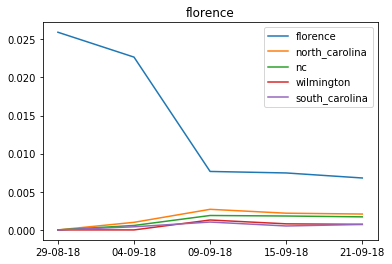

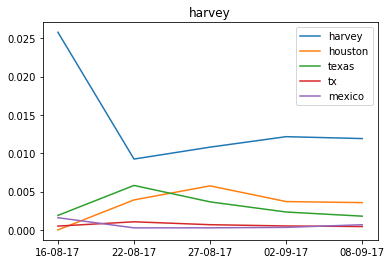

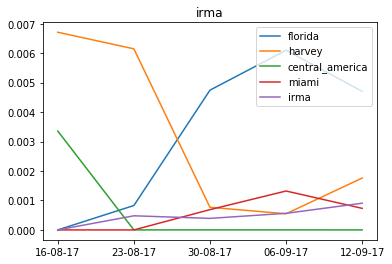

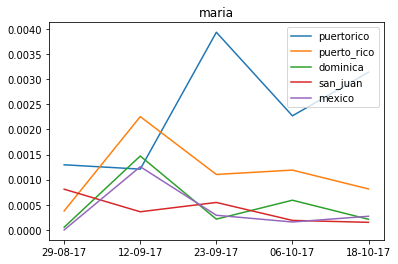

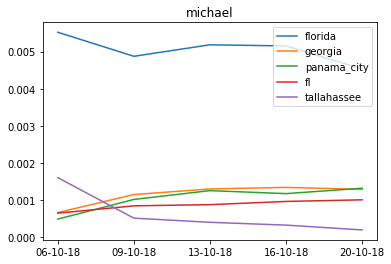

In [370]:
top_k = 5
vocab_cols = list(set(NE_LOC_fixed_date_freq.columns) - set(['DATE_STAMP', 'NAME']))
for data_name_i, data_i in NE_LOC_fixed_date_freq.groupby('NAME'):
    X = np.arange(data_i.shape[0])
#     print(data_name_i)
    data_i_top_k = data_i.loc[:, vocab_cols].sum(axis=0).sort_values(inplace=False, ascending=False).iloc[:top_k]
#     print(data_i_top_k)
    for data_j_name in data_i_top_k.index:
        plt.plot(X, data_i.loc[:, data_j_name], label=data_j_name)
    plt.legend(loc='upper right')
    # set X ticks
    date_stamps_i = data_i.loc[:, 'DATE_STAMP'].apply(lambda x: datetime.strftime(datetime.fromtimestamp(x), '%d-%m-%y'))
    plt.xticks(X, date_stamps_i)
#     plt.yscale('log')
    plt.title(data_name_i)
    plt.show()
#     break

/hg190/istewart6/miniconda3/envs/crisis_language/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


hurricane_florence    0.976554
horry_county          0.971733
katrina               0.966615
chicago               0.965767
craven_county         0.962680
dtype: float64


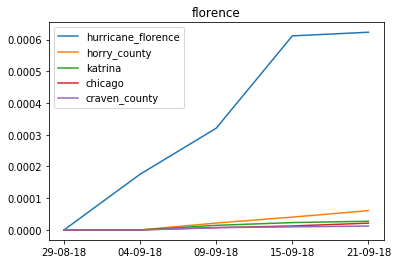

atlantic_basin              -0.358421
national_hurricane_center   -0.360147
olivia                      -0.360399
atlantic_ocean              -0.833134
florence                    -0.900114
dtype: float64


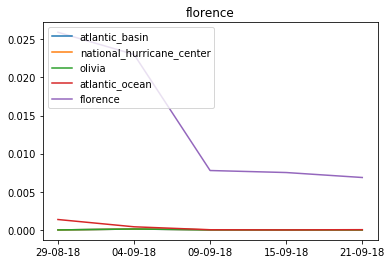

america_    0.996910
dr          0.993866
ga          0.993646
gop         0.993576
georgia     0.992397
dtype: float64


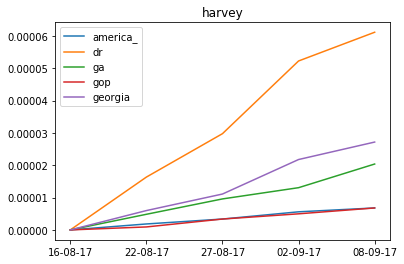

lufkin          -0.722121
galveston_      -0.755932
corpuschristi   -0.760177
south_texas     -0.777664
twitter         -0.791529
dtype: float64


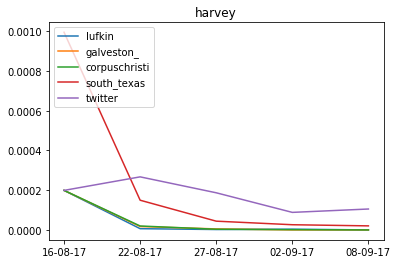

orange_park    0.974460
india          0.974451
bay_area       0.971813
denver         0.971317
mumbai         0.970893
dtype: float64


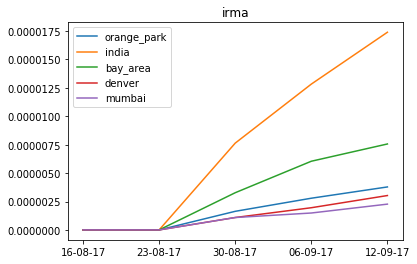

eastern_atlantic   -0.364635
central_america    -0.707101
jose               -0.714237
irma               -0.715469
harvey             -0.796122
dtype: float64


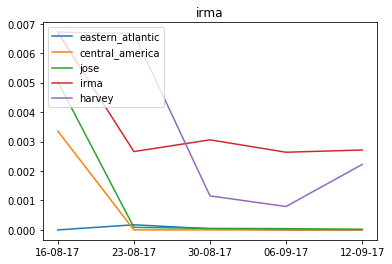

dc                 0.985321
flint              0.967877
hurricane_maria    0.876624
fl                 0.876197
utuado             0.854707
dtype: float64


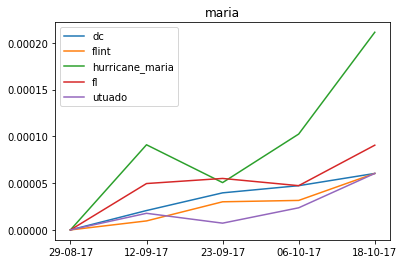

caguas        -0.898374
islas         -0.898567
puerto_rico   -0.901184
ponce         -0.920185
carolina      -0.942942
dtype: float64


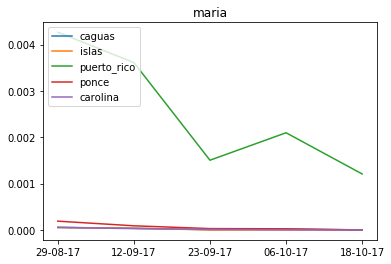

washington     0.987448
port_st_joe    0.986983
tyndall        0.982799
jackson        0.982739
port_st        0.981596
dtype: float64


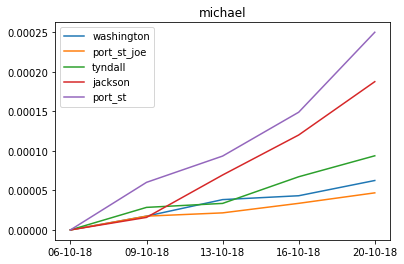

michael          -0.938036
savannah         -0.941871
miami            -0.952275
uk               -0.958895
south_carolina   -0.964517
dtype: float64


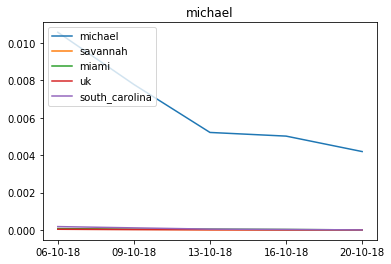

In [371]:
from scipy.stats import pearsonr
top_k = 5
for data_name_i, data_i in NE_fixed_date_freq.groupby('NAME'):
    X = np.arange(data_i.shape[0])
    # compute Pearson growth for all words (consistent growth > monotonic growth)
    corr_i = data_i.loc[:, vocab_cols].apply(lambda x: pearsonr(X, x)[0], axis=0).sort_values(inplace=False, ascending=False)
    corr_i.dropna(inplace=True)
    corr_i_high = corr_i.head(top_k)
    corr_i_low = corr_i.tail(top_k)
#     print(corr_i)
#     print(data_i_top_k) 
    for corr_i_k in [corr_i_high, corr_i_low]:
        print(corr_i_k)
        for data_j_name in corr_i_k.index:
            plt.plot(X, data_i.loc[:, data_j_name], label=data_j_name)
        plt.legend(loc='upper left')
        # set X ticks
        date_stamps_i = data_i.loc[:, 'DATE_STAMP'].apply(lambda x: datetime.strftime(datetime.fromtimestamp(x), '%d-%m-%y'))
        plt.xticks(X, date_stamps_i)
    #     plt.yscale('log')
        plt.title(data_name_i)
        plt.show()
#     break

OK! So the location tagger is quite good for certain cases (Florence, Michael, Maria) and less good for others (Irma, Harvey-growth). Should we switch to the Ritter tagger? DO NOT WANT

### Extract descriptor information
Before we get into parsing, let's try to extract descriptors using just basic patterns (e.g. "San Juan, PR" = `[(?=, PR)]`).

In [ ]:
import re
DESCRIPTOR_MATCHER_1 = re.compile('.+(?=, [A-Z]{2,})')